# Relation between submissions amount and Linear Regression Performance

This notebook try to find a relation between amount of submission and performance of Linear Regression Model (LR). The propose is identify if exists a least amount necessary of submissions to train a LR model and obtain a similar performance as training with the complete dataset. The main objetive is to determine if there is a small proportion of dataset that allows to train the model with a certain number of submissions. If it's possible to recognice a minimun of submissions for training the LR per exercise, usually exercises doesnt have a lot of submissions. 

In [1]:
!pip install -U -q PyDrive

You are using pip version 10.0.0, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt

#from google.colab import auth
#from oauth2client.client import GoogleCredentials

#from pydrive.auth import GoogleAuth
#from pydrive.drive import GoogleDrive


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [3]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# choose a local (colab) directory to store the data.
local_download_path = os.path.expanduser('~/data')
try:
  os.makedirs(local_download_path)
except: pass

# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile(
    {'q': "'13en9vvGWxAsEXgTcUM5C_pVfbLykfrpC' in parents"}).GetList()

for f in file_list:
  # 3. Create & download by id.
  fname = os.path.join(local_download_path, f['title'])
  f_ = drive.CreateFile({'id': f['id']})
  f_.GetContentFile(fname)


os.listdir('./data')

['submissions_darVuelta.json',
 'submissions_Triángulos.json',
 'submissions_siguiente.json',
 'submissions_triple.json',
 'submissions_productoria.json',
 'submissions_Pattern Matching con Tuplas.json',
 'submissions_armarFixture.json',
 'puerta18_2018-1.json',
 'linear_regression_performance.csv',
 'submissions_Tipando funciones.json',
 'submissions_La Estructura.json',
 'submissions_aplanar.json',
 'submissions_Pinos.json',
 'submissions_Juntando todo.json',
 'Copia de Copia de linear_regression_performance.csv',
 'submissions_Un poco de anatomía.json',
 'pdep-utn_verano-2016.json',
 'submissions_intercalar.json',
 'submissions_Generalizando a ap, cuarta parte.json',
 'submissions_Primero lo primero: mapeos.json',
 'distribution_by_exercise.csv',
 'submissions_¡Terminala! Parte 2.json',
 'submissions_No todo los que brilla....json',
 'submissions_rotar.json',
 'submissions_sinRepetidos.json',
 'submissions_maximoSegun.json',
 'submissions_Textos.json',
 'submissions_estaVacio, con d

# Load previous results
Previously we trained a Linear Regression model for each exercise of failed_submission dataset you can see the experiment in this notebook [LINK]. Now, load distribution by status and report classification (precission, recall, f1-score) for each exercise.

In [4]:
distribution_by_exercise = pd.read_csv('./distribution_by_exercise.csv', usecols=['exercise', 'submission_amount', 'errored', 'failed', 'passed', 'passed_with_warnings'], skipfooter=1)
lr_performance = pd.read_csv('./linear_regression_performance.csv', usecols=['exercise', 'precision', 'recall', 'f1-score', 'amount_tested', 'submission_amount'])

In [10]:
lr_performance

,exercise,precision,recall,f1-score,amount_tested,submission_amount
0,Descontrolarse,0.50,0.49,0.49,43,107
1,"validarIguales, sobre validados",0.58,0.65,0.60,48,119
2,quienesPueden,0.63,0.58,0.59,52,129
3,Alcohol en Sangre con fold,0.72,0.71,0.71,52,130
4,positivosYNegativos,0.61,0.52,0.52,60,148
5,Pedir bebida,0.53,0.57,0.55,60,149
6,Composción,0.63,0.52,0.52,61,151
7,validarIguales,0.71,0.70,0.70,66,163
8,Haciendo functores,0.54,0.58,0.56,66,165
9,estadisticas,0.51,0.54,0.52,72,178


In [6]:
distribution_by_exercise = distribution_by_exercise[distribution_by_exercise['submission_amount'] > 100]
distribution_by_exercise['equity'] = (
    np.abs(distribution_by_exercise['errored'].astype(float) - distribution_by_exercise['failed'].astype(float)) +
    np.abs(distribution_by_exercise['errored'].astype(float) - distribution_by_exercise['passed'].astype(float)) +
    np.abs(distribution_by_exercise['errored'].astype(float) - distribution_by_exercise['passed_with_warnings'].astype(float))+
    np.abs(distribution_by_exercise['failed'].astype(float) - distribution_by_exercise['errored'].astype(float)) +
    np.abs(distribution_by_exercise['failed'].astype(float) - distribution_by_exercise['passed'].astype(float)) +
    np.abs(distribution_by_exercise['failed'].astype(float)
           - distribution_by_exercise['passed_with_warnings'].astype(float)) +
    np.abs(distribution_by_exercise['passed'].astype(float) - distribution_by_exercise['errored'].astype(float)) +
    np.abs(distribution_by_exercise['passed'].astype(float) - distribution_by_exercise['failed'].astype(float))+
    np.abs(distribution_by_exercise['passed'].astype(float) - distribution_by_exercise['passed_with_warnings'].astype(float))+
    np.abs(distribution_by_exercise['passed_with_warnings'].astype(float) - distribution_by_exercise['errored'].astype(float)) +
    np.abs(distribution_by_exercise['passed_with_warnings'].astype(float) - distribution_by_exercise['failed'].astype(float))+
    np.abs(distribution_by_exercise['passed_with_warnings'].astype(float) - distribution_by_exercise['passed'].astype(float)))

distribution_by_exercise.sort_values('equity')

,exercise,submission_amount,errored,failed,passed,passed_with_warnings,equity
159,nivelNafta,1152,0.311632,0.171875,0.266493,0.225694,0.920139
266,Juntando todo,3734,0.257365,0.341725,0.190145,0.201928,1.020354
70,Minimo Común Múltiplo ¡Con infinitas!,264,0.234848,0.280303,0.208333,0.045455,1.462121
288,haceFrioF,10367,0.328446,0.340889,0.131282,0.181634,1.551268
71,elMasWinner,266,0.255639,0.398496,0.150376,0.195489,1.609023
122,primerosN,691,0.173661,0.322721,0.240232,0.076700,1.609262
102,"totalKilosProductos, de nuevo",522,0.245211,0.312261,0.337165,0.086207,1.639847
193,autos,1663,0.441972,0.165364,0.187613,0.190619,1.665664
69,"repetirPalabras, variante",263,0.254753,0.361217,0.269962,0.079848,1.718631
132,estaVacio,776,0.275773,0.305412,0.338918,0.060567,1.729381


# Select exercises as sample
As we said at the top of notebook, we are looking for a relation between submissions amount and linear regression performance (by the moment, cosidering f1-score, recall and precisison). As first approach, use chocoboPlateado as first exercise to experiment.

In [0]:
def load_submission_exercise(exercise_name):
    """
    Function to load dataset file for exercise
    
    Params:
    exercise_name: name of exercise that appears on filename
    """
    dataset_home = "./data/"
    exercise = 'submissions_'+str(exercise_name)+'.json'
    json_file = open(os.path.join(dataset_home, exercise), encoding='utf8')
    json_data = json.load(json_file)
    submissions = pd.io.json.json_normalize(json_data)
    return submissions


In [0]:
def clean_submissions(submissions_df, to_train=False):
    """
    submissions_df: Dataframe with submissions
    to_train: indicate if dataframe will be use for training

    Function to cleaning dataset
    """
    submissions_df = submissions_df[~(submissions_df['status'] == 'aborted')]
    submissions_df = submissions_df[~(submissions_df['status'] == 'pending')]
    submissions_df = submissions_df[~(submissions_df['status'] == 'running')]
    submissions_df = submissions_df[~(submissions_df['status'] == 'manual_evaluation_pending')]
    
    if to_train:
            submissions_df = submissions_df[submissions_df['content'] != ""]
            submissions_df = submissions_df[~submissions_df['content'].isnull()]
    return submissions_df

## Clean Submissions
We're interested spcifiically in four status values: **errored **, ** failed**, ** passed_with_warnings** and ** passed **. We are going to drop all the submissions with 'manual_pending' 'pending', 'aborted', 'running' status, because them don't provide significative data about the code and the feedback is related with server or technical problems of the Mumuki platform and they were'nt statiscally significant, as we can see on the table below. 

Should we discard passed_with_warning because the proportion of submissions with this status is not significant?


In [9]:
exercise_name = 'esMayorDeEdad'
submissions = load_submission_exercise(exercise_name)
submissions_cleaned = clean_submissions(submissions, to_train=True)
submissions_cleaned.shape

(1727, 39)

In [0]:
def calculate_distribution_percentage(df, column_name, exercise):
    """
    df: Dataframe with submissions
    column_name: column with status

    Function to obtain distribution of submissions status
    return metrics and amount of submissions
    """
    total_amount_submissions = df.shape[0]
    submissions_grouped = df.groupby([column_name]).size()
    metrics = {}
    metrics = submissions_grouped / total_amount_submissions
    metrics['exercise'] = str(exercise)
    metrics['submission_amount'] = total_amount_submissions
    return metrics

# Calculate submissions distribution
Even though we already calculate the distribution, we do it again just to remember it.

In [11]:
metrics = calculate_distribution_percentage(submissions_cleaned, 'status', exercise_name)
metrics

status
errored                      0.138969
failed                        0.44586
passed                        0.22293
passed_with_warnings         0.192241
exercise                esMayorDeEdad
submission_amount                1727
dtype: object

# Subsampling dataset
We are going to subsampling dataset trying to keeping the distribution of subsmissions status as original dataset.
To do this we use pandas method sample https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html

In the cell below we will take a subsample of 20 elements 10 times and calculate distribution, in order to show that distribution is kept.

In [12]:
metrics_samples = pd.DataFrame(columns=['exercise', 'errored', 'failed','passed','passed_with_warnings','submission_amount'])
for i in range(10):
    sample = submissions_cleaned.sample(n=20)
    metrics_ss = calculate_distribution_percentage(sample, 'status', 'sample '+str(i))
    metrics_samples = (metrics_samples.append(metrics_ss, ignore_index=True)).fillna(value=0)

metrics_samples.mean()

errored                  0.125
failed                   0.450
passed                   0.235
passed_with_warnings     0.190
submission_amount       20.000
dtype: float64

##  Slicing Dataset
In the code below, the dataset will be sliced in differents portions, so the dataset slices will be used to train a linear regression model and obtain metrics.

In [0]:
def slice_and_train(submission_cleaned, step=20):
    """
    Function that slice dataset by step first slice contain 20 examples
    in the following slices 20 elements more are selected ramdomly from de dataset
    
    Params:
    submission_cleaned: dataFrame with submissions cleaned, where there no 
    """
    slices = [i for i in range(20,submission_cleaned.shape[0],step)]
    perf_by_slice = pd.DataFrame(columns=['iteracion', 'precision', 'recall', 'f1-score', 'amount_tested', 'slice_size'])

    for j in range(10):
        for slice_amount in slices:
            submissions_slice = submissions_cleaned.sample(n=slice_amount, replace=True)

            X = submissions_slice['content']
            Y = submissions_slice['status']

            X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.40, random_state=32)
            #Featurize submissions content
            cv = CountVectorizer(lowercase=False)
            X_transformed = cv.fit_transform(X_train)

            #Featurize status submissions
            le = LabelEncoder()
            Y_transformed = le.fit_transform(Y_train)

            #Train linear regression for multi label classification
            lr = OneVsRestClassifier(LinearRegression(n_jobs=-1))
            lr.fit(X_transformed, Y_transformed)

            #classify Test set
            predicted = lr.predict(cv.transform(X_test))

            #obtain metrics avg/total
            #shape of metrics
            #precision    recall  f1-score   amount_tested
            try:
                metrics_by_exercise = classification_report(le.transform(Y_test), predicted, target_names=le.classes_, digits=2).split()[-4:]
                metrics_by_exercise = [str(j)] + metrics_by_exercise + [int(slice_amount)]
                perf_by_slice.loc[len(perf_by_slice)+1]= metrics_by_exercise
            except:
                pass
    return perf_by_slice

In [0]:
perf_by_slice = slice_and_train(submissions_cleaned, 200)


# Plotting 
In the cell below define a function that recive a dataFrame with performace obtained for each trained model 

In [0]:
def plot_realtion_submission_performance(performance_dataframe):
    fig, axes = plt.subplots(figsize=(20, 10), nrows=2, ncols=2)
    fig.subplots_adjust(left=0.2, wspace=0.2, hspace=0.5)
    font = {'family': 'serif',
            'color':  'Black',
            'weight': 'normal',
            'size': 18,
            }

    ax0, ax1, ax2, ax3 = axes.flatten()
    ax0.set_title('Mean and Standard Deviation', fontdict=font)
    ax1.set_title('Relation between Precission and Submission amount', fontdict=font)
    ax2.set_title('Relation between Recall and Submission amount', fontdict=font)
    ax3.set_title('Relation between F1-Score and Submission amount', fontdict=font)

    mean = performance_dataframe.astype(float).groupby('slice_size')['precision'].mean()
    std = performance_dataframe.astype(float).groupby('slice_size')['precision'].std()

    
    ax0.errorbar(mean.keys(), mean.values, std.values, linestyle='None', marker='^', label='test')
    
    ax1.plot(performance_dataframe['slice_size'].astype(float),
             performance_dataframe['precision'].astype(float), 'o', color='b')


    ax2.plot(performance_dataframe['slice_size'].astype(float), 
             performance_dataframe['recall'].astype(float), '*', color='r')

    ax3.plot(performance_dataframe['slice_size'].astype(float),
             performance_dataframe['f1-score'].astype(float), '^', color='g')
    
    legend = ax0.legend(shadow=True, fontsize='large', fancybox=True,
        prop={'size': 10}, frameon=True, ncol=1, markerscale=1)
    legend.get_frame().set_facecolor('white')

    legend = ax1.legend(shadow=True, fontsize='large', fancybox=True,
        prop={'size': 10}, frameon=True, ncol=1, markerscale=1)
    legend.get_frame().set_facecolor('white')

    legend = ax2.legend(shadow=True, fontsize='large', fancybox=True,
        prop={'size': 10}, frameon=True, ncol=1, markerscale=1)
    legend.get_frame().set_facecolor('white')

    legend = ax3.legend(shadow=True, fontsize='large', fancybox=True,
        prop={'size': 10}, frameon=True, ncol=1, markerscale=1)
    legend.get_frame().set_facecolor('white')


    ax0.tick_params(axis='x', labelsize=15)
    ax0.tick_params(axis='y', labelsize=15)

    ax0.set_xlabel('Slice Size', fontsize=15)
    ax1.set_xlabel('Slice Size', fontsize=15)
    ax2.set_xlabel('Slice Size', fontsize=15)
    ax3.set_xlabel('Slice Size', fontsize=15)

    ax1.tick_params(axis='x', labelsize=15)
    ax1.tick_params(axis='y', labelsize=15)

    ax2.tick_params(axis='x', labelsize=15)
    ax2.tick_params(axis='y', labelsize=15)

    ax3.tick_params(axis='x', labelsize=15)
    ax3.tick_params(axis='y', labelsize=15)


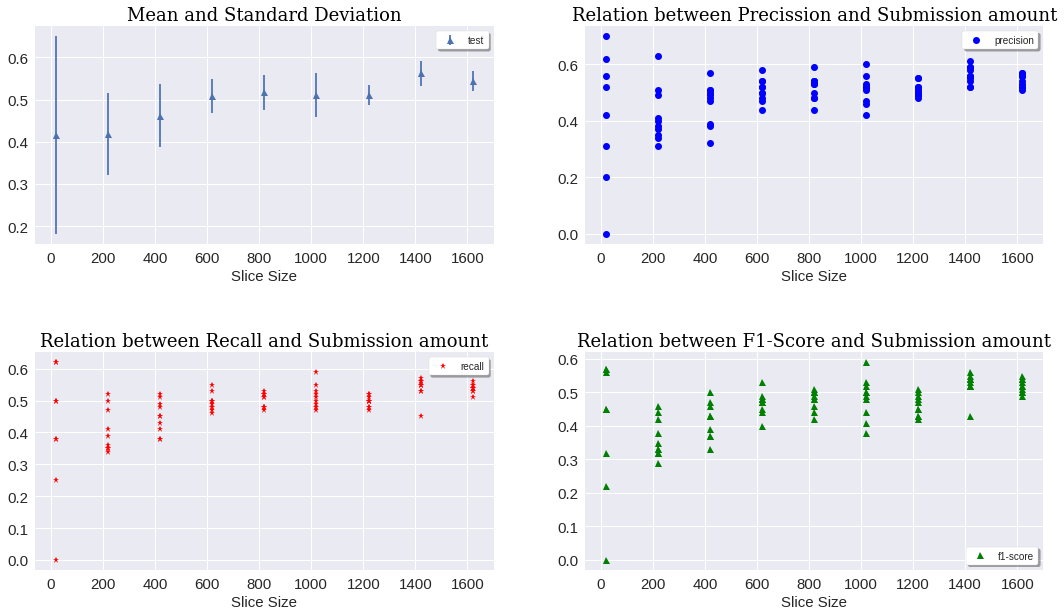

In [16]:
plot_realtion_submission_performance(perf_by_slice)

# Deeper Analysis
Now we select some exercises by differents criterion:
- equitable distribution among states with less than 300 submissions
- equitable distribution among states with more than 1k submissions
- one majority class with less than 300 submissions
- one majority class with more than 2k submissions
- two majority class with less than 300 submissions
- two majority class with more than 2k submissions 

when we mention "two majority class" we think in all possible combination. 
Cosidering equity of distribution as the sum of difference between all the possible status.

In [0]:
def analyze_one_exercise(exercise, step):
    submissions_fn = load_submission_exercise(exercise)
    submissions_cleaned_fn = clean_submissions(submissions_fn)
    print("Total Amount of training examples {} \n".format(submissions_cleaned_fn.shape[0]))
    metrics_fn = calculate_distribution_percentage(submissions_cleaned_fn, 'status', exercise)
    print("Distribution (only to remember) {}".format(metrics_fn))
    performer = slice_and_train(submissions_cleaned_fn, step=step)
    plot_realtion_submission_performance(performer)


## Equitable distribution among states with less than 1k submissions

There aren't execirse that have equitable distrubution and have less than 1k of submissions because usually passes_with_warning class doesn't appear frequently in exercises. So we decided to use exercises that are not belong to mumuki.io but was in the past.

### elMasWinner exercise

Total Amount of training examples 266 

Distribution (only to remember) status
errored                    0.255639
failed                     0.398496
passed                     0.150376
passed_with_warnings       0.195489
exercise                elMasWinner
submission_amount               266
dtype: object


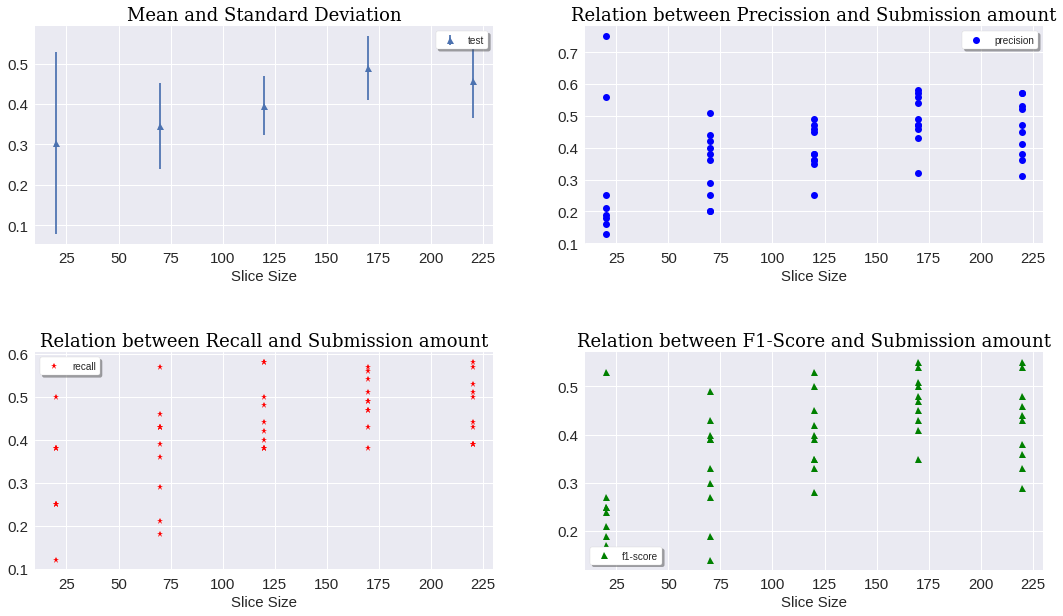

In [18]:
analyze_one_exercise('elMasWinner', 50)

### tiempoTotal exercise

Total Amount of training examples 627 

Distribution (only to remember) status
errored                    0.210526
failed                     0.446571
passed                     0.194577
passed_with_warnings       0.148325
exercise                tiempoTotal
submission_amount               627
dtype: object


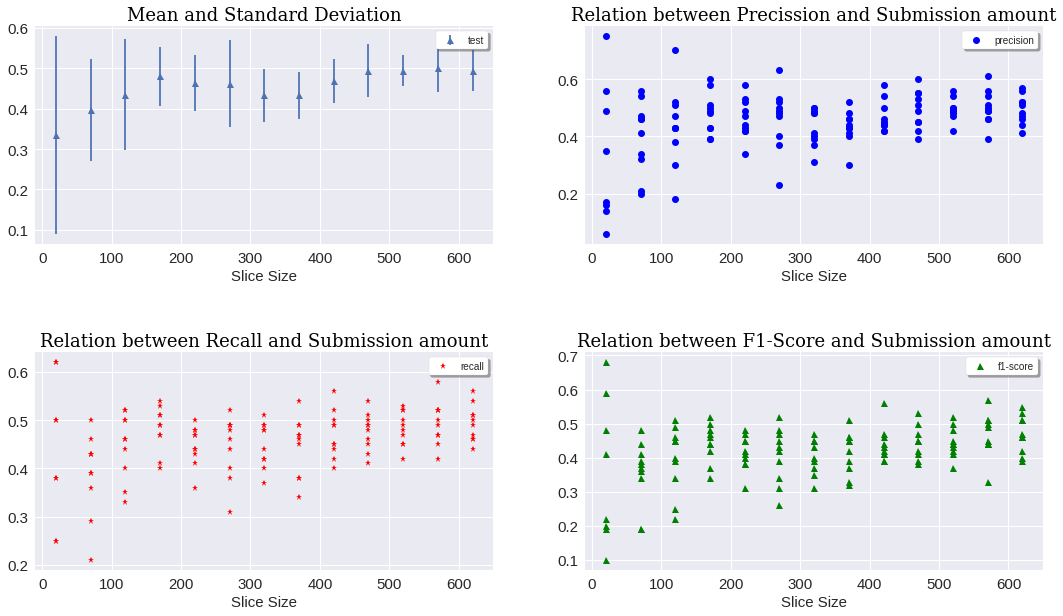

In [19]:
analyze_one_exercise('tiempoTotal', 50)

##  Equitable distribution among states with more than 1k submissions

### haceFrioF exercise (Guide 2)

Total Amount of training examples 10183 

Distribution (only to remember) status
errored                  0.334381
failed                   0.347049
passed                   0.133654
passed_with_warnings     0.184916
exercise                haceFrioF
submission_amount           10183
dtype: object


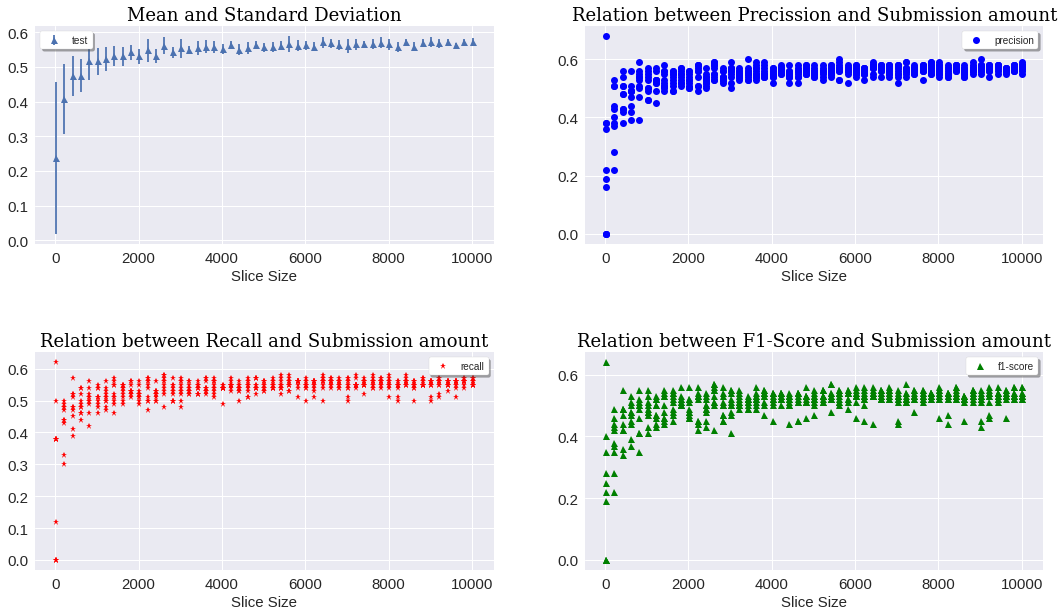

In [20]:
analyze_one_exercise('haceFrioF', 200)

### Juntando Todo (Guide 3)

Total Amount of training examples 3701 

Distribution (only to remember) status
errored                       0.25966
failed                       0.344772
passed                        0.19184
passed_with_warnings         0.203729
exercise                Juntando todo
submission_amount                3701
dtype: object


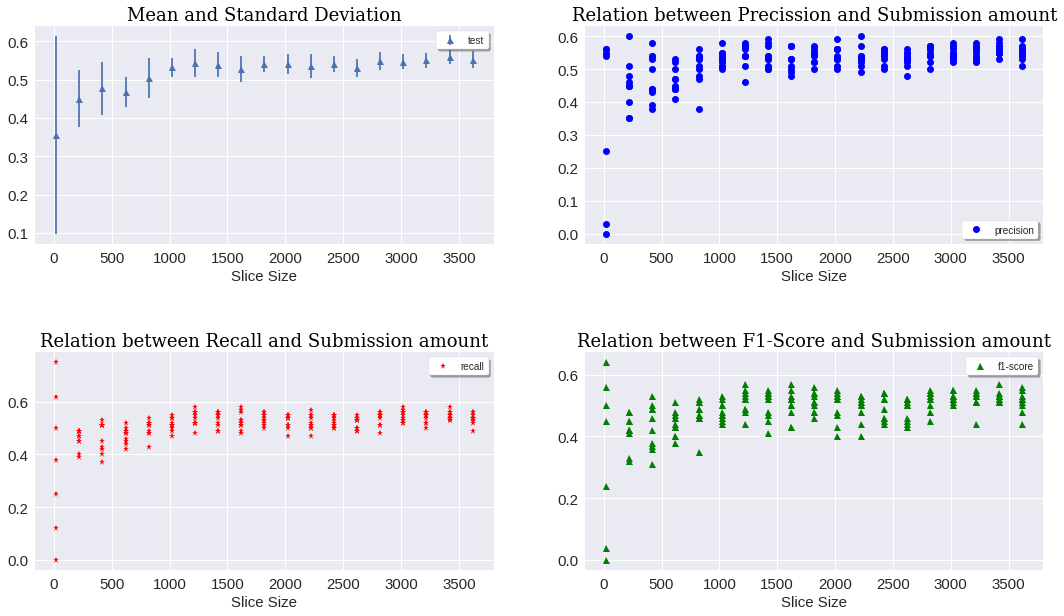

In [21]:
analyze_one_exercise('Juntando todo', 200)

### Pattern Matching Con Tuplas exercise (Guide 7)

Total Amount of training examples 1310 

Distribution (only to remember) status
errored                                    0.148092
failed                                     0.142748
passed                                     0.418321
passed_with_warnings                        0.29084
exercise                Pattern Matching con Tuplas
submission_amount                              1310
dtype: object


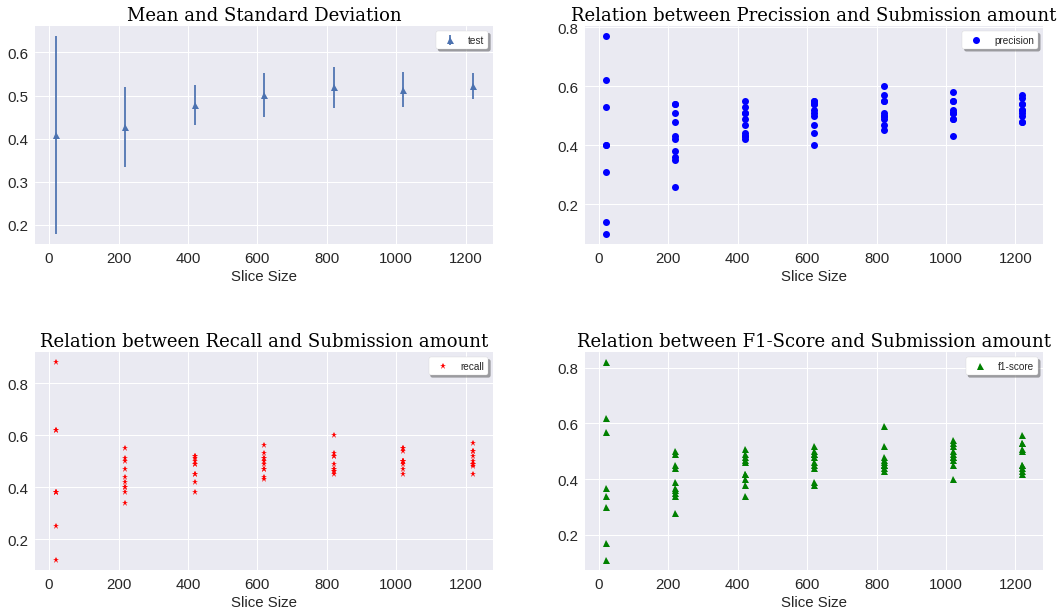

In [22]:
analyze_one_exercise('Pattern Matching con Tuplas', 200)

### Textos exercise (Guide 8)

Total Amount of training examples 3629 

Distribution (only to remember) status
errored                  0.14825
failed                  0.497107
passed                  0.171948
passed_with_warnings    0.182695
exercise                  Textos
submission_amount           3629
dtype: object


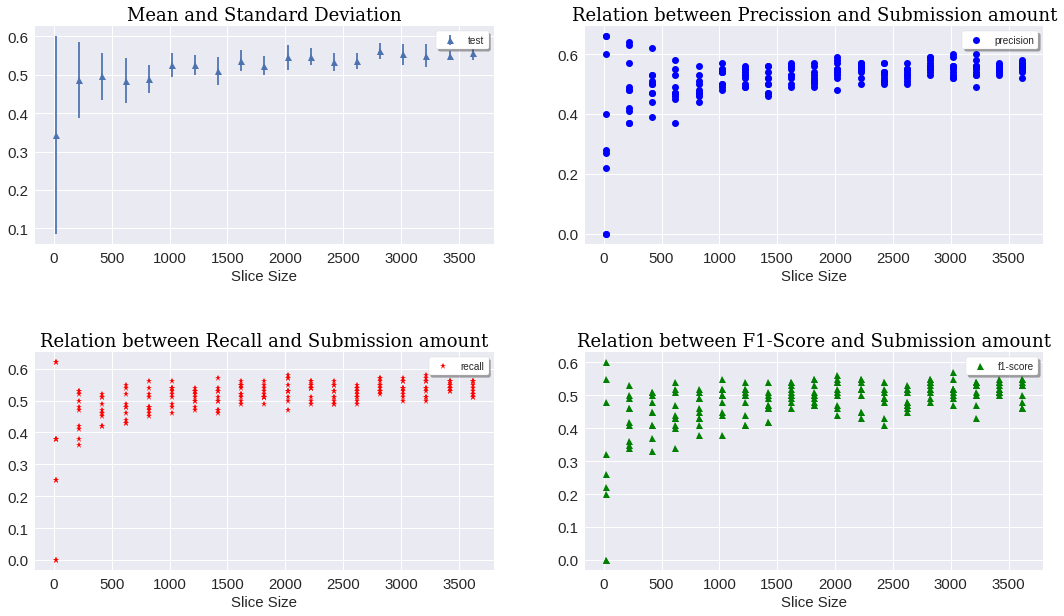

In [23]:
analyze_one_exercise('Textos', 200)

### Cuantas Muzzas exercise (Guide 9)

Total Amount of training examples 1664 

Distribution (only to remember) status
errored                       0.242788
failed                        0.452524
passed                        0.114784
passed_with_warnings          0.189904
exercise                Cuantas Muzzas
submission_amount                 1664
dtype: object


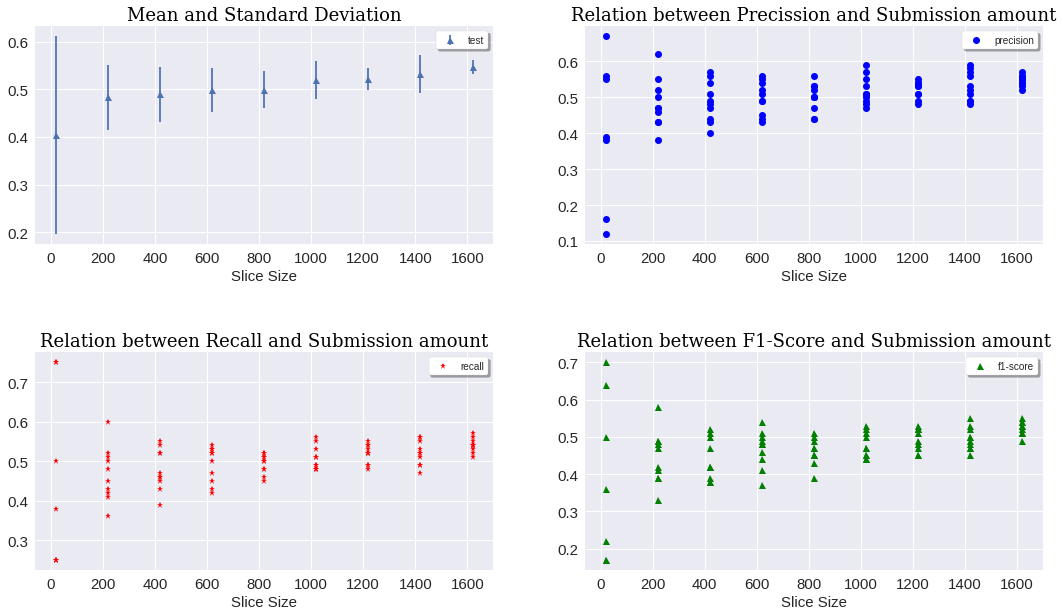

In [24]:
analyze_one_exercise('Cuantas Muzzas', 200)

# One majority class with less than 1k submissions

## Errored Class
The exercises selected has as majority class Errored

### La Estructura exercise

Total Amount of training examples 476 

Distribution (only to remember) status
errored                   0.672269
failed                     0.22479
passed                    0.102941
exercise             La Estructura
submission_amount              476
dtype: object


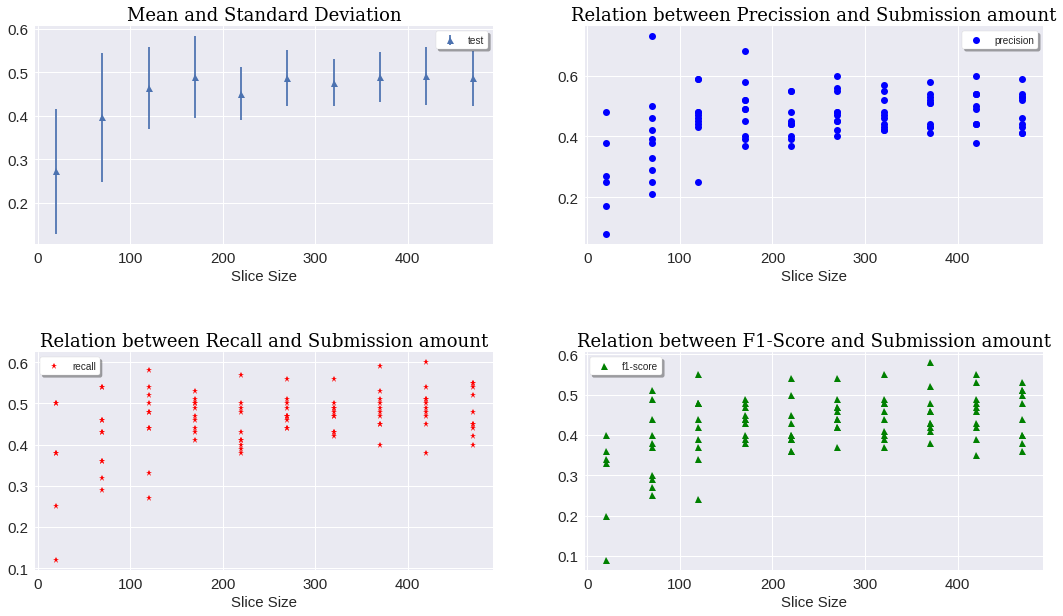

In [25]:
analyze_one_exercise('La Estructura', 50)

### valorMensual exercise

Total Amount of training examples 509 

Distribution (only to remember) status
errored                  0.607073
failed                   0.318271
passed                  0.0746562
exercise             valorMensual
submission_amount             509
dtype: object


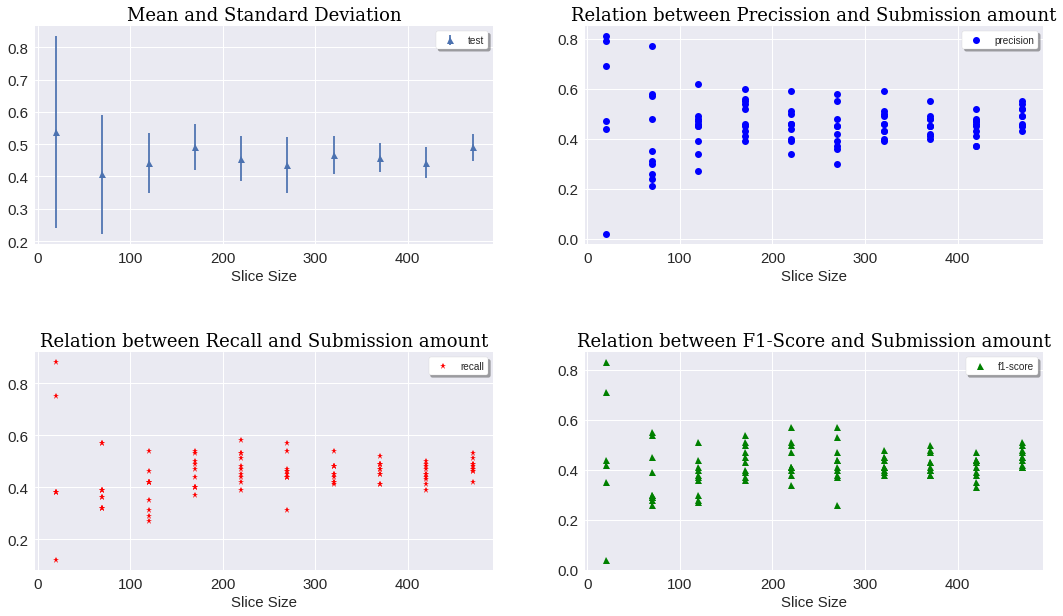

In [26]:
analyze_one_exercise('valorMensual', 50)

### Agregandole azucar exercise

Total Amount of training examples 706 

Distribution (only to remember) status
errored                        0.592068
failed                         0.130312
passed                          0.27762
exercise             Agregandole azucar
submission_amount                   706
dtype: object


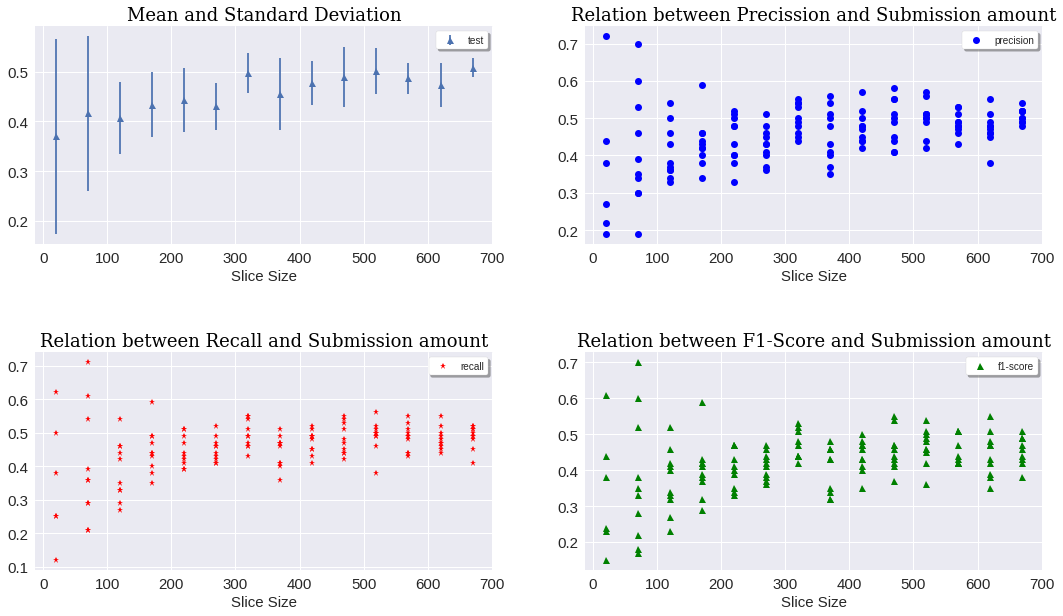

In [27]:
analyze_one_exercise('Agregandole azucar', 50)

### ¿Y las funciones, para cuándo?   exercise

Total Amount of training examples 761 

Distribution (only to remember) status
errored                                       0.529566
failed                                        0.106439
passed                                        0.231275
passed_with_warnings                           0.13272
exercise                ¿Y las funciones, para cuando?
submission_amount                                  761
dtype: object


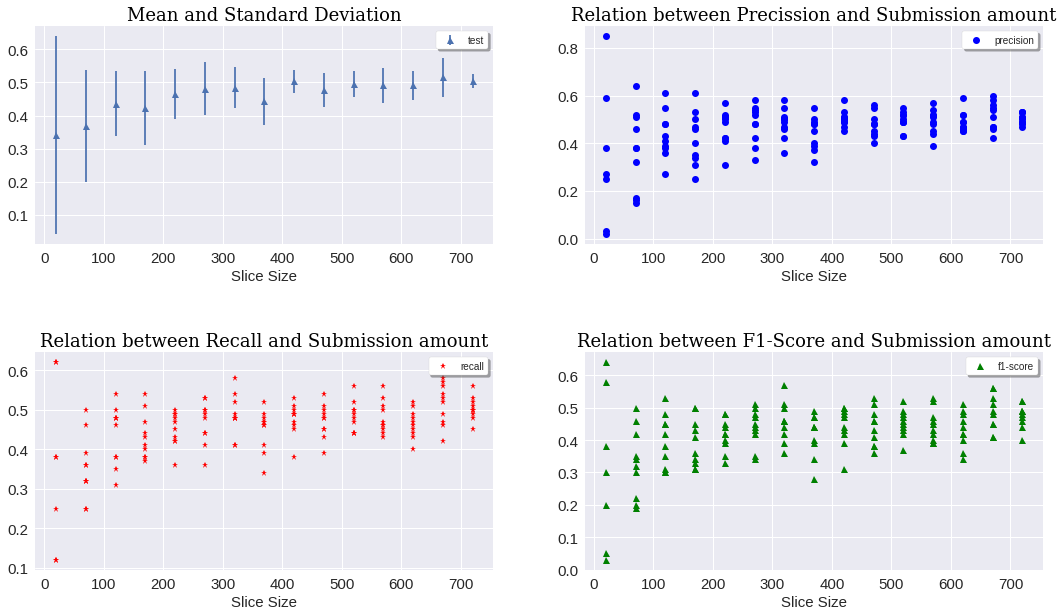

In [28]:
analyze_one_exercise('¿Y las funciones, para cuando?', 50)

### Generalizando a ap, cuarta parte exercise

Total Amount of training examples 345 

Distribution (only to remember) status
errored                                         0.513043
failed                                          0.371014
passed                                         0.0666667
passed_with_warnings                           0.0492754
exercise                Generalizando a ap, cuarta parte
submission_amount                                    345
dtype: object


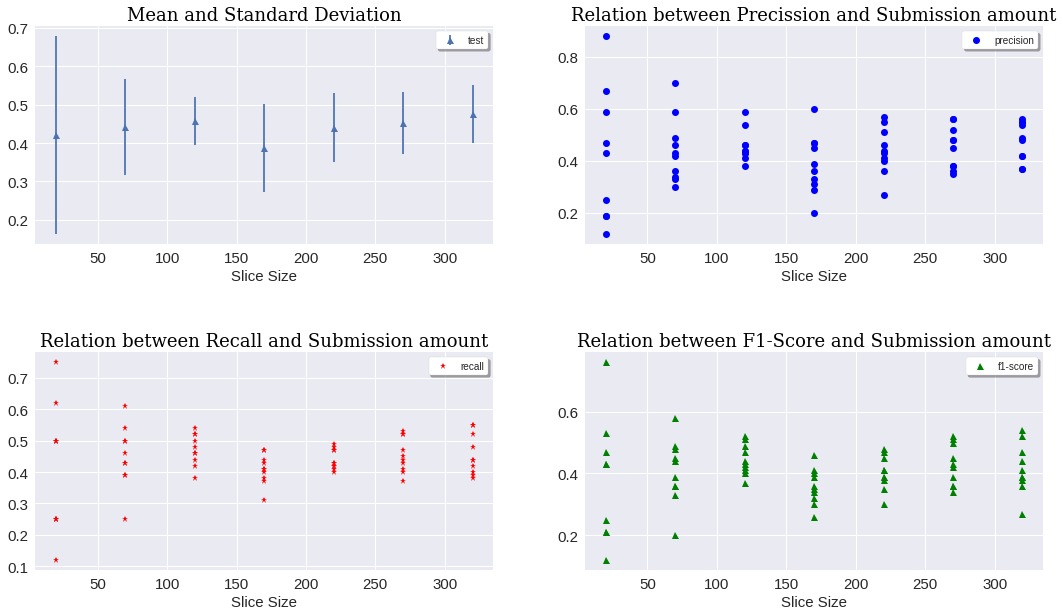

In [29]:
analyze_one_exercise('Generalizando a ap, cuarta parte', 50)

## Failed Class
The exercises selected has as majority class Failed

### diferencias exercise

Total Amount of training examples 862 

Distribution (only to remember) status
errored                    0.273782
failed                     0.487239
passed                     0.233179
passed_with_warnings     0.00580046
exercise                diferencias
submission_amount               862
dtype: object


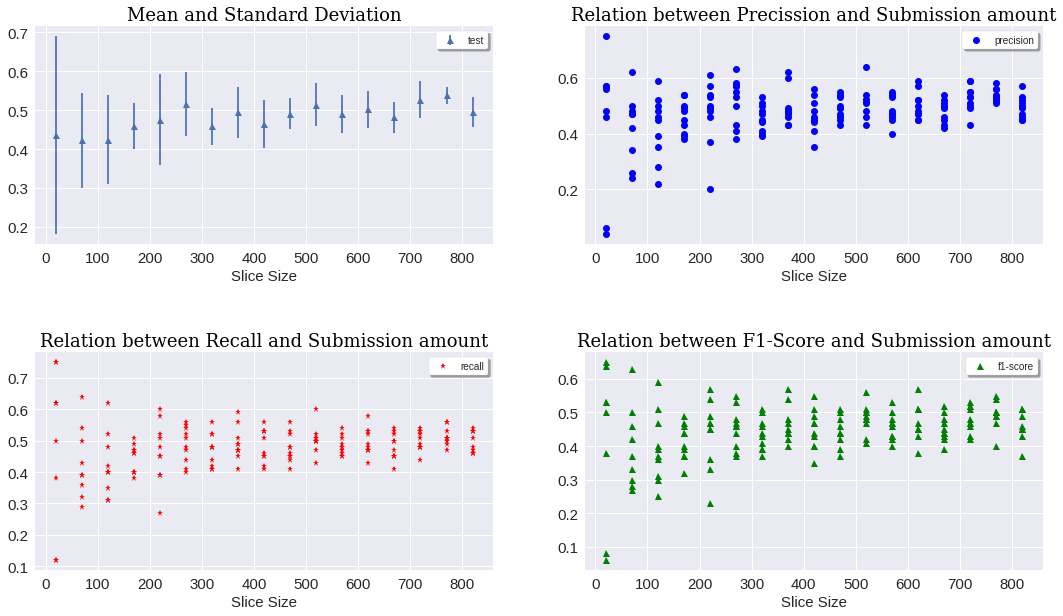

In [30]:
analyze_one_exercise('diferencias', 50)


### intercalar exercise

Total Amount of training examples 473 

Distribution (only to remember) status
errored               0.0993658
failed                 0.712474
passed                 0.188161
exercise             intercalar
submission_amount           473
dtype: object


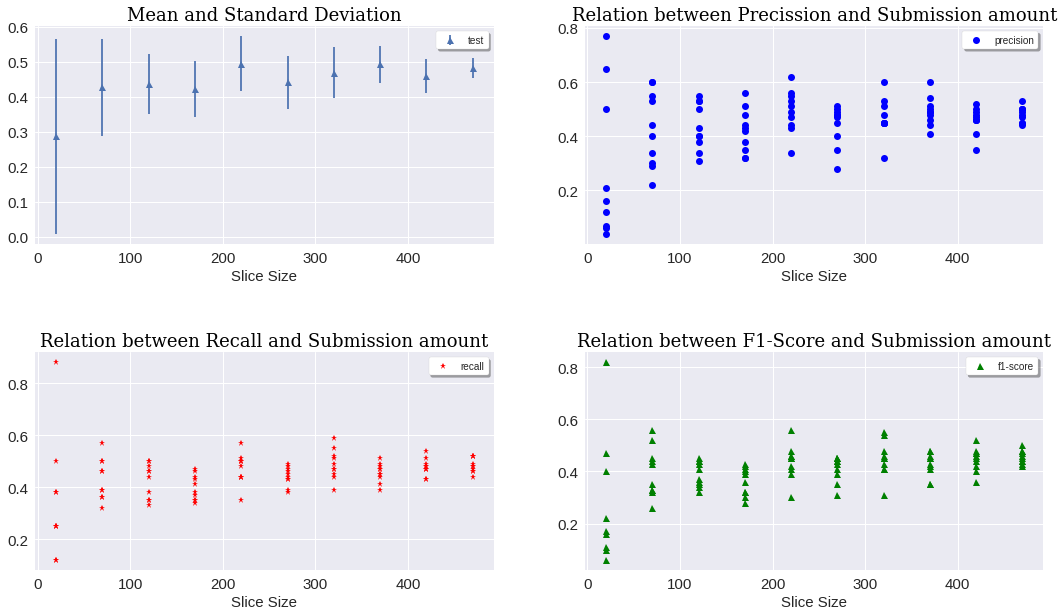

In [31]:
analyze_one_exercise('intercalar', 50)

### aplanar exercise

Total Amount of training examples 238 

Distribution (only to remember) status
errored                 0.0798319
failed                   0.554622
passed                   0.352941
passed_with_warnings     0.012605
exercise                  aplanar
submission_amount             238
dtype: object


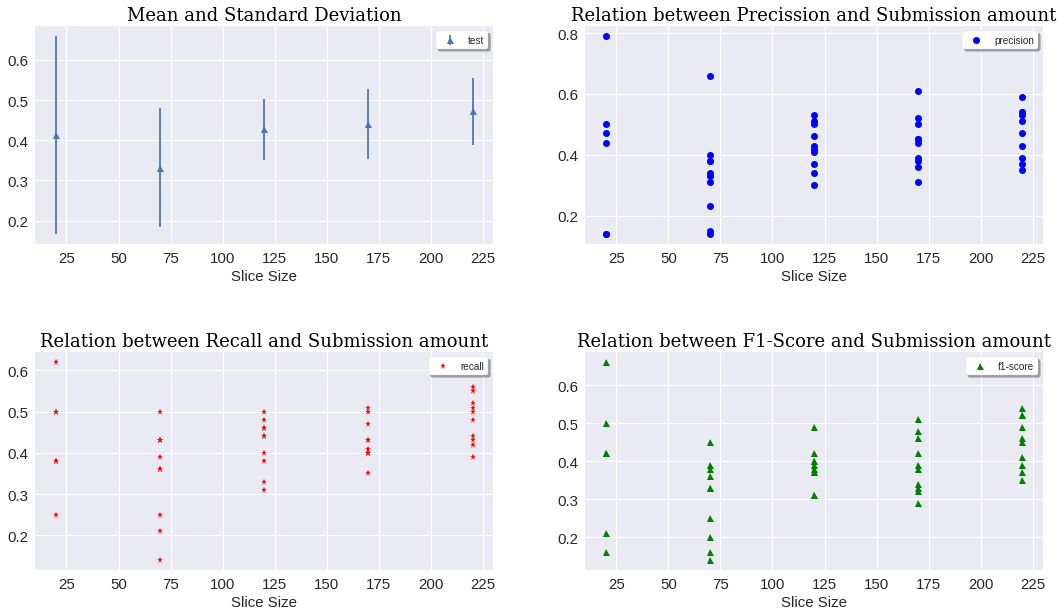

In [32]:
analyze_one_exercise('aplanar', 50)

### maximoSegun exercise

Total Amount of training examples 812 

Distribution (only to remember) status
errored                    0.171182
failed                     0.600985
passed                     0.213054
passed_with_warnings      0.0147783
exercise                maximoSegun
submission_amount               812
dtype: object


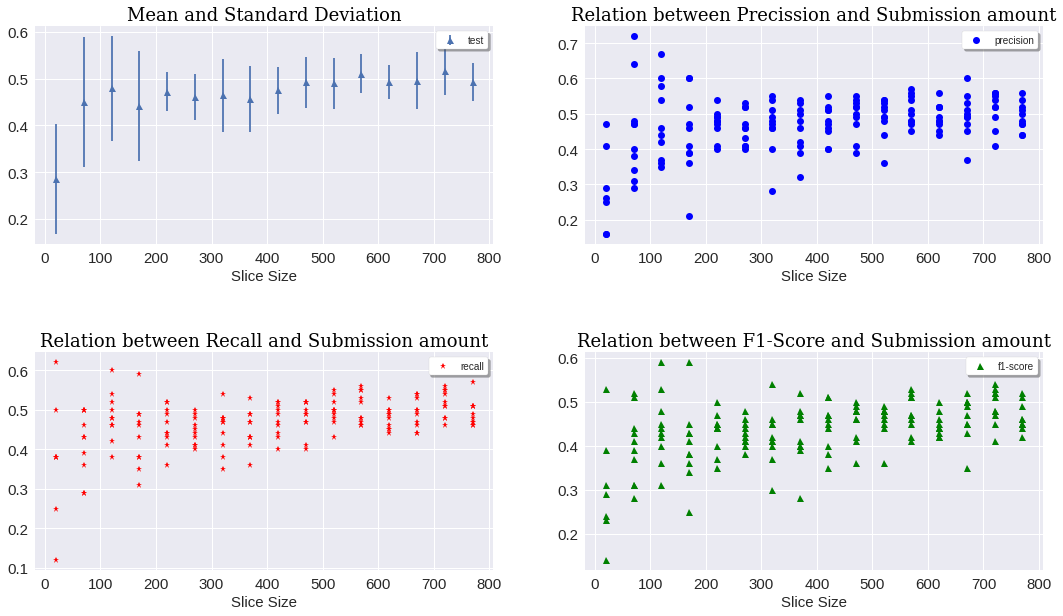

In [33]:
analyze_one_exercise('maximoSegun', 50)

## Passed Class
The exercises selected has as majority class Passed

### Area exercise

Total Amount of training examples 608 

Distribution (only to remember) status
errored              0.108553
failed               0.105263
passed               0.786184
exercise                 Área
submission_amount         608
dtype: object


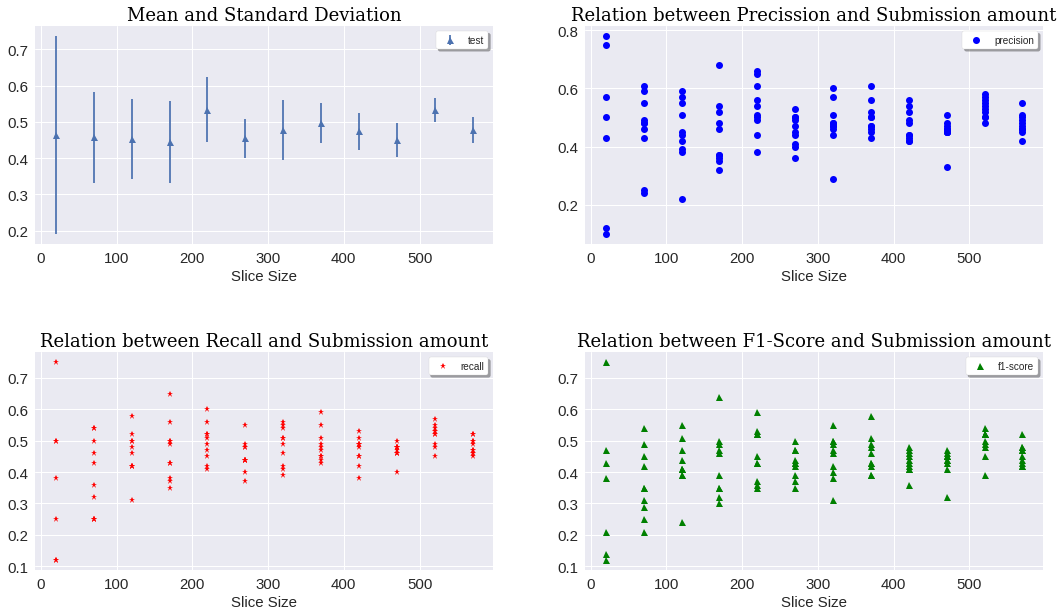

In [34]:
analyze_one_exercise('Área', 50)

### hayAlgunNegativo exercise

Total Amount of training examples 520 

Distribution (only to remember) status
errored                        0.0980769
failed                          0.136538
passed                          0.734615
passed_with_warnings           0.0307692
exercise                hayAlgunNegativo
submission_amount                    520
dtype: object


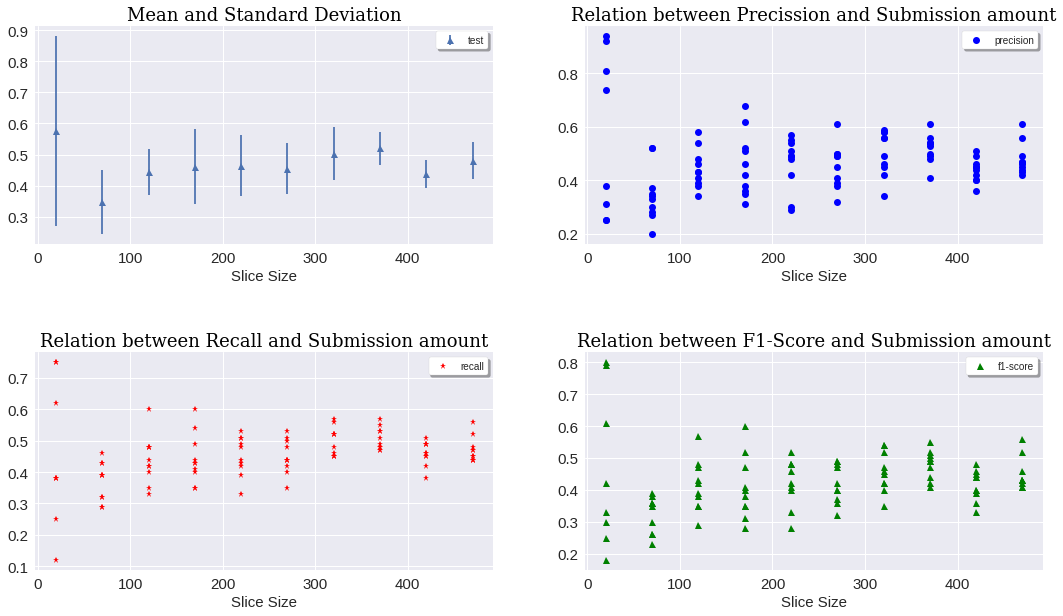

In [35]:
analyze_one_exercise('hayAlgunNegativo', 50)

### No todo lo que brilla es oro exercise

Total Amount of training examples 388 

Distribution (only to remember) status
errored                                  0.128866
failed                                   0.231959
passed                                   0.631443
passed_with_warnings                   0.00773196
exercise                No todo los que brilla...
submission_amount                             388
dtype: object


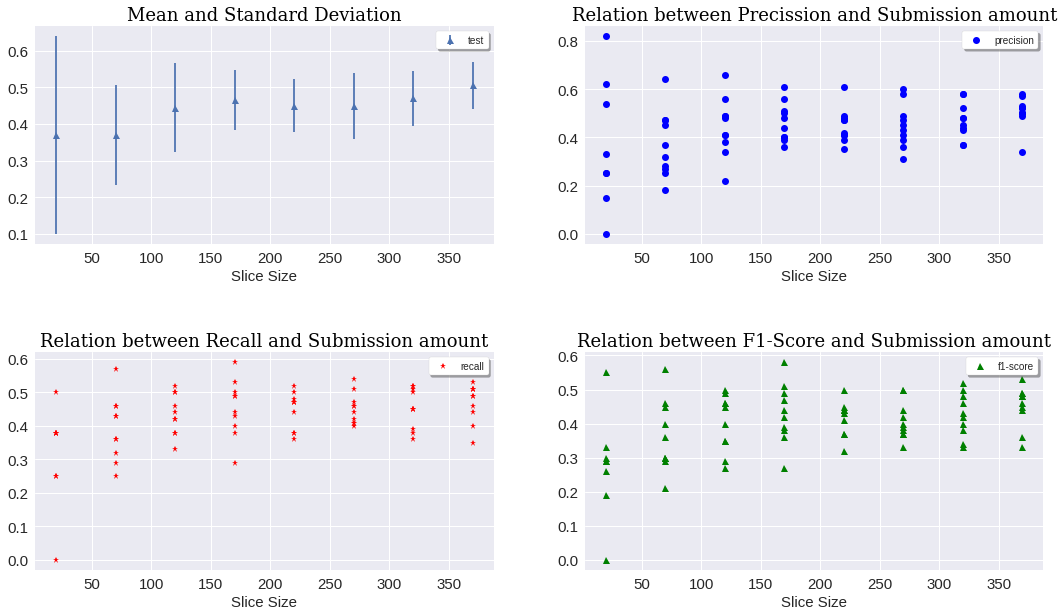

In [36]:
analyze_one_exercise('No todo los que brilla...', 50)

### Composicion exercise

Total Amount of training examples 152 

Distribution (only to remember) status
errored                   0.105263
failed                    0.355263
passed                    0.526316
passed_with_warnings     0.0131579
exercise                Composción
submission_amount              152
dtype: object


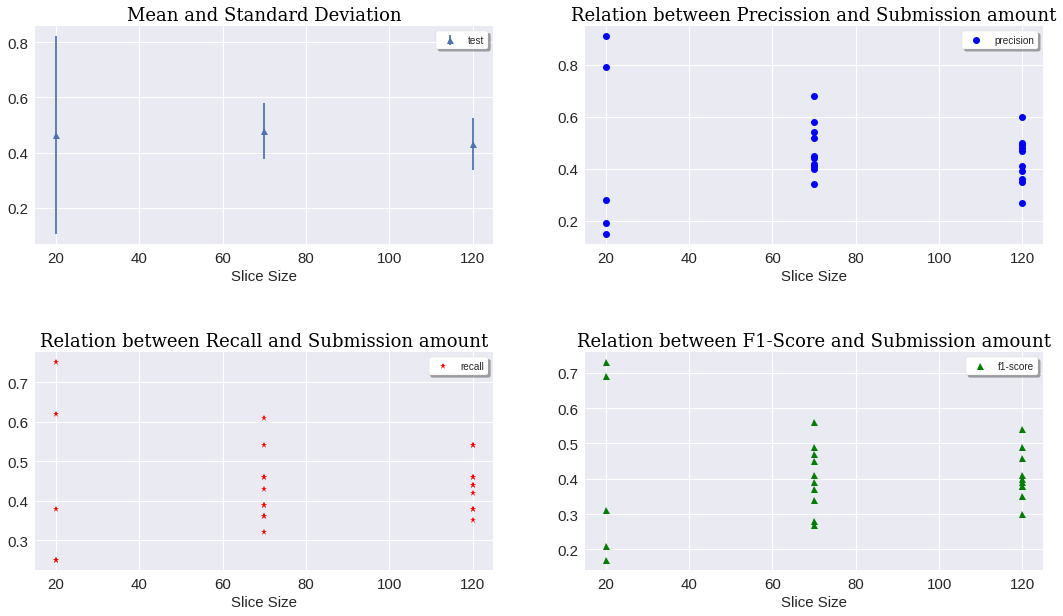

In [37]:
analyze_one_exercise('Composción', 50)

### Un poco de anatomia exercise

Total Amount of training examples 472 

Distribution (only to remember) status
errored                            0.311441
failed                            0.0444915
passed                             0.641949
passed_with_warnings             0.00211864
exercise                Un poco de anatomía
submission_amount                       472
dtype: object


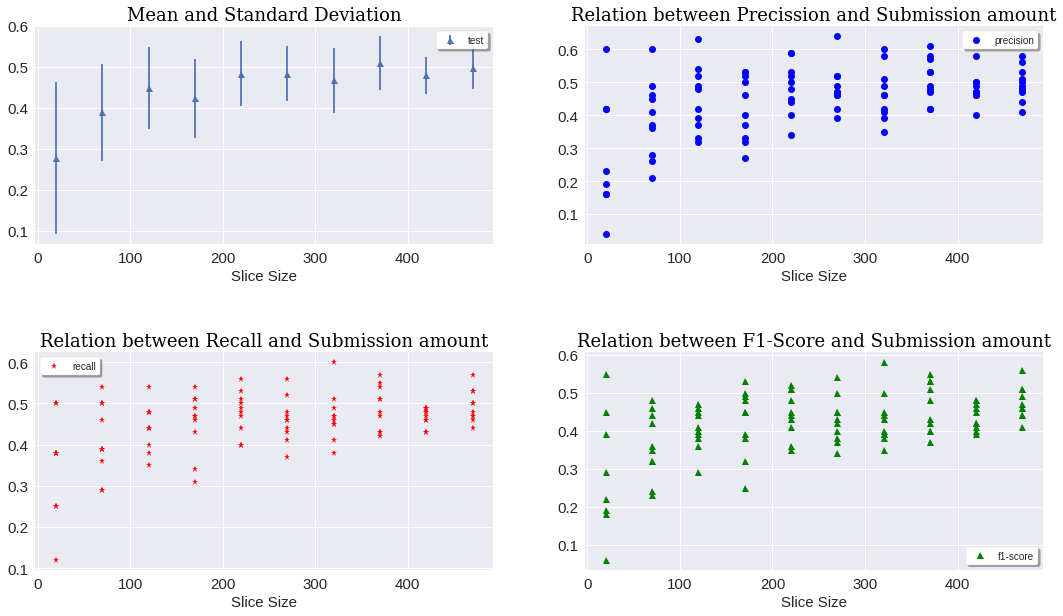

In [38]:
analyze_one_exercise('Un poco de anatomía', 50)

# One majority class with more than 1k submissions

## Errored Class
The exercises selected has as majority class Errored

### Dispersion exercise (Guide 2)

Total Amount of training examples 2493 

Distribution (only to remember) status
errored                   0.568793
failed                    0.222623
passed                     0.17489
passed_with_warnings     0.0336943
exercise                Dispersión
submission_amount             2493
dtype: object


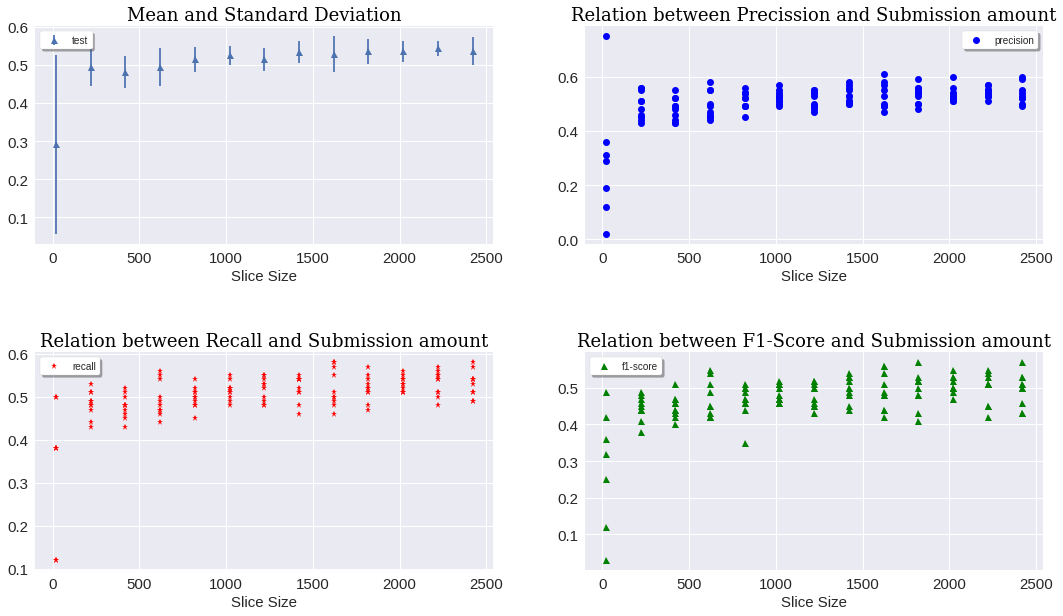

In [43]:
analyze_one_exercise('Dispersión', 200)

### Clase de Tipos exercise (Guide 3)

Total Amount of training examples 5306 

Distribution (only to remember) status
errored                          0.562571
failed                           0.206747
passed                           0.197701
passed_with_warnings            0.0329815
exercise                ¡Clases de tipos!
submission_amount                    5306
dtype: object


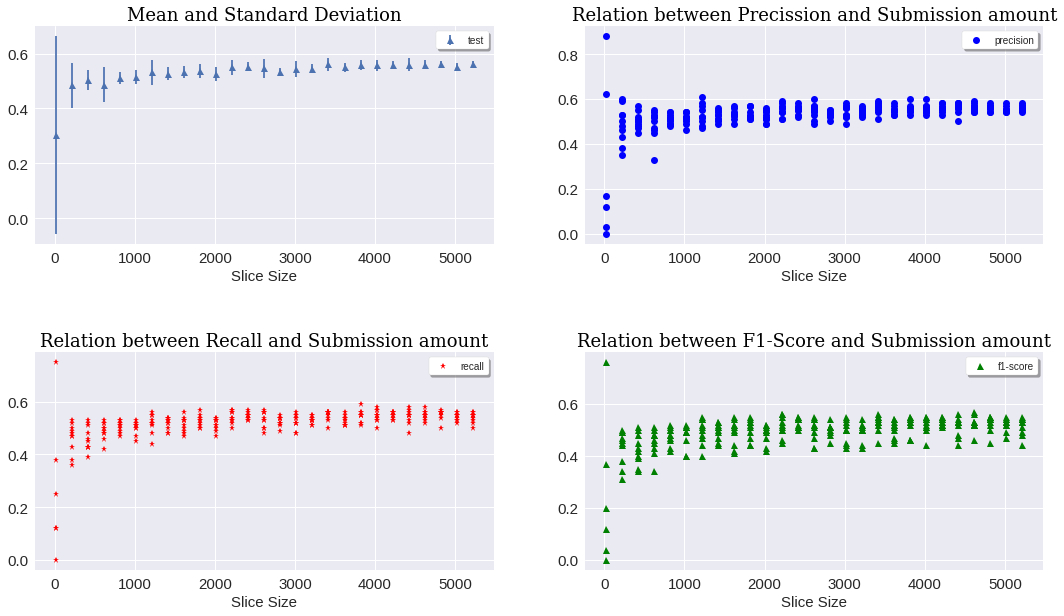

In [44]:
analyze_one_exercise('¡Clases de tipos!', 200)

## Failed Class
The exercises selected has as majority class Failed


### cantidadTuitsCortos exercise (Guide 8)

Total Amount of training examples 3830 

Distribution (only to remember) status
errored                            0.147781
failed                             0.597389
passed                             0.110183
passed_with_warnings               0.144648
exercise                cantidadTuitsCortos
submission_amount                      3830
dtype: object


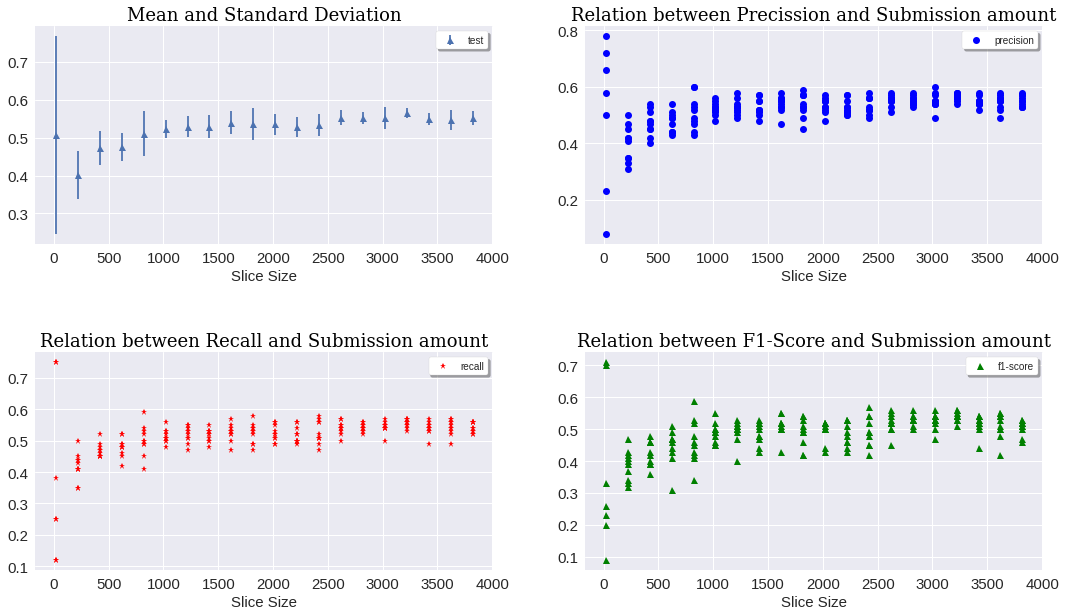

In [45]:
analyze_one_exercise('cantidadTuitsCortos', 200)

### ordenDeLasCondiciones exercise (Guide 7)

Total Amount of training examples 2530 

Distribution (only to remember) status
errored                                  0.25415
failed                                  0.490119
passed                                   0.23083
passed_with_warnings                   0.0249012
exercise                Orden de las Condiciones
submission_amount                           2530
dtype: object


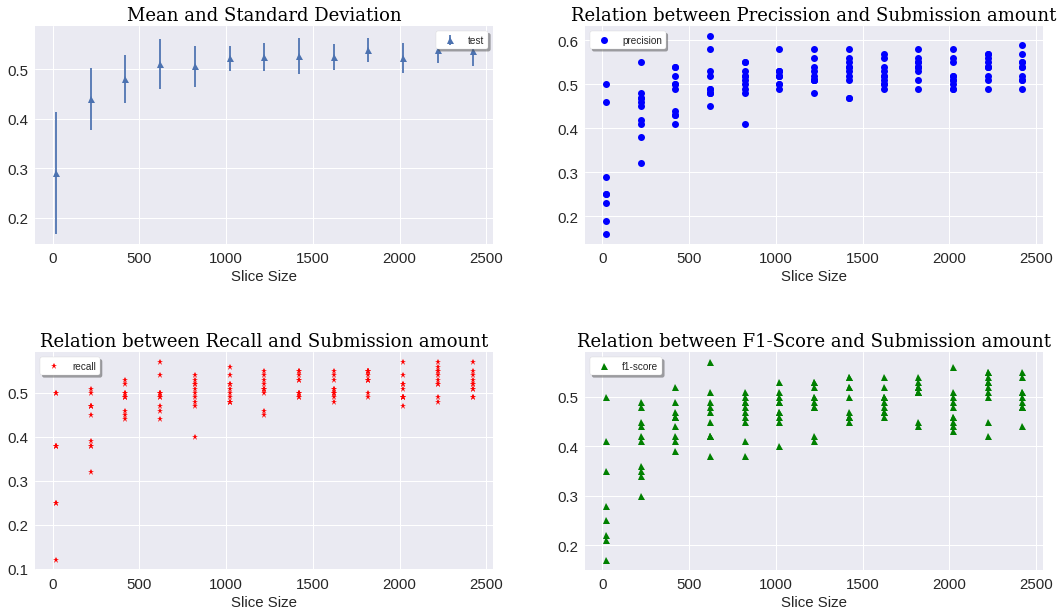

In [47]:
analyze_one_exercise('Orden de las Condiciones', 200)

###  darVuelta exercise (Guide 6)

Total Amount of training examples 2979 

Distribution (only to remember) status
errored                  0.107419
failed                   0.527694
passed                   0.145351
passed_with_warnings     0.219537
exercise                darVuelta
submission_amount            2979
dtype: object


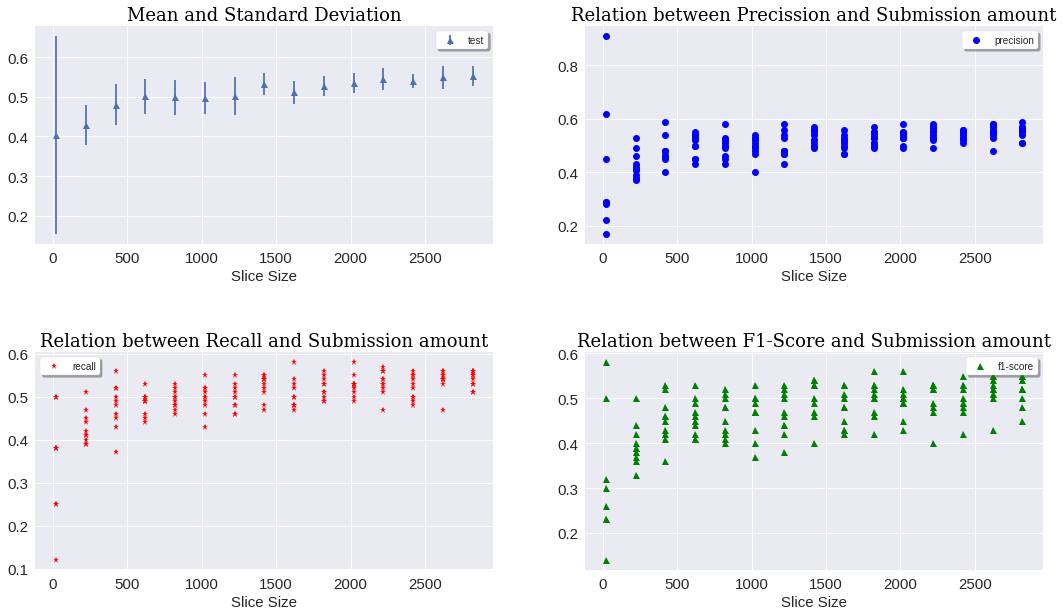

In [48]:
analyze_one_exercise('darVuelta', 200)

### armarFixture exercise (Guide 9)

Total Amount of training examples 2126 

Distribution (only to remember) status
errored                     0.204139
failed                      0.618062
passed                       0.10301
passed_with_warnings       0.0747883
exercise                armarFixture
submission_amount               2126
dtype: object


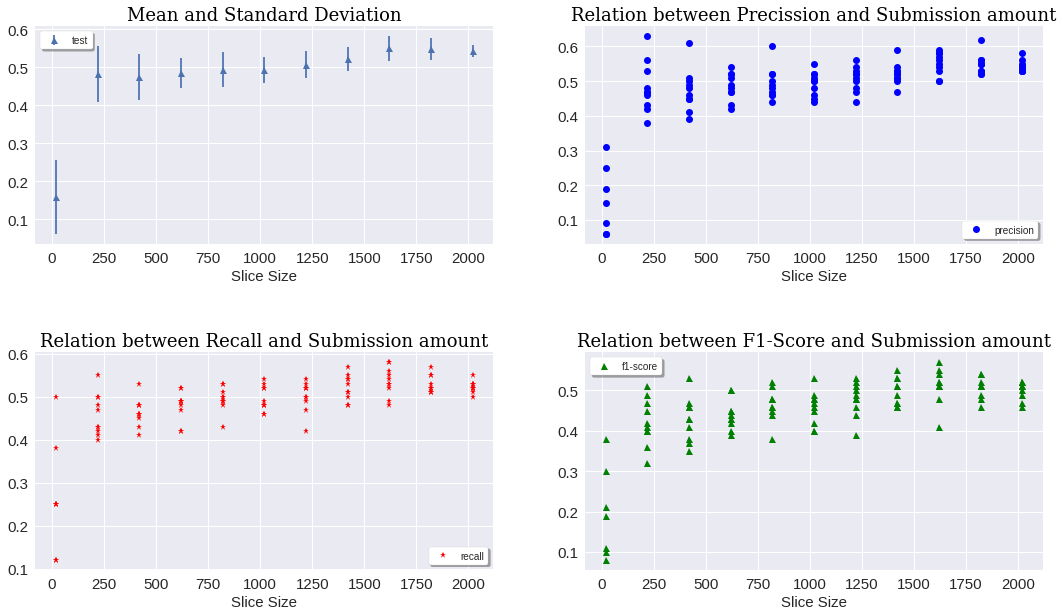

In [49]:
analyze_one_exercise('armarFixture', 200)

### esBisiesto  exercise (Guide 2)

Total Amount of training examples 22418 

Distribution (only to remember) status
errored                   0.241592
failed                     0.62539
passed                   0.0858685
passed_with_warnings     0.0471496
exercise                esBisiesto
submission_amount            22418
dtype: object


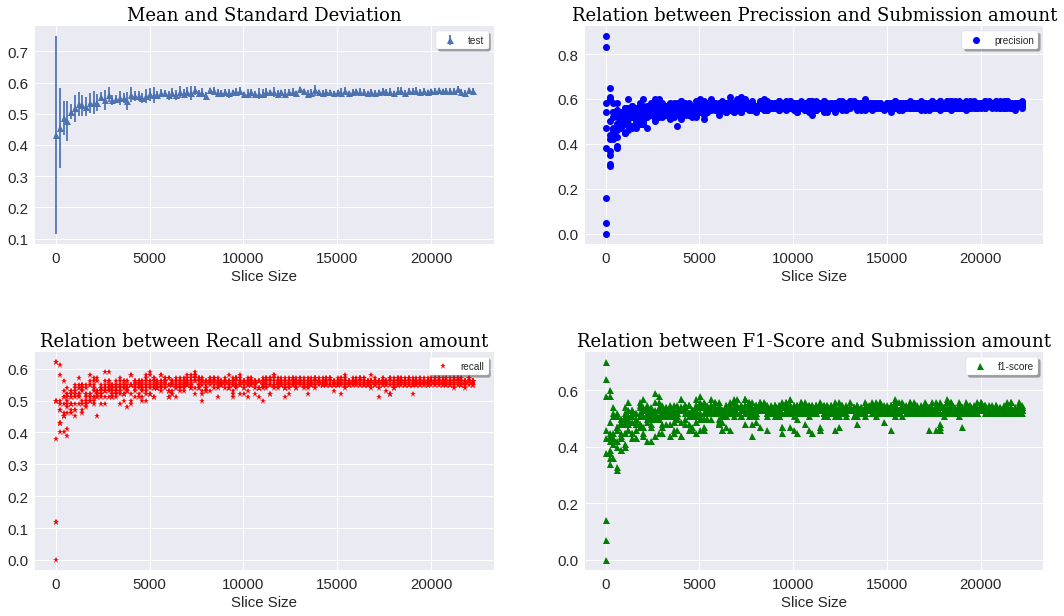

In [51]:
analyze_one_exercise('esBisiesto', 200)

## Passed Class
The exercises selected has as majority class Passed


### Triangulos exercise (Guide 1)

Total Amount of training examples 2886 

Distribution (only to remember) status
errored                   0.205128
failed                    0.171171
passed                    0.556826
passed_with_warnings     0.0668746
exercise                Triángulos
submission_amount             2886
dtype: object


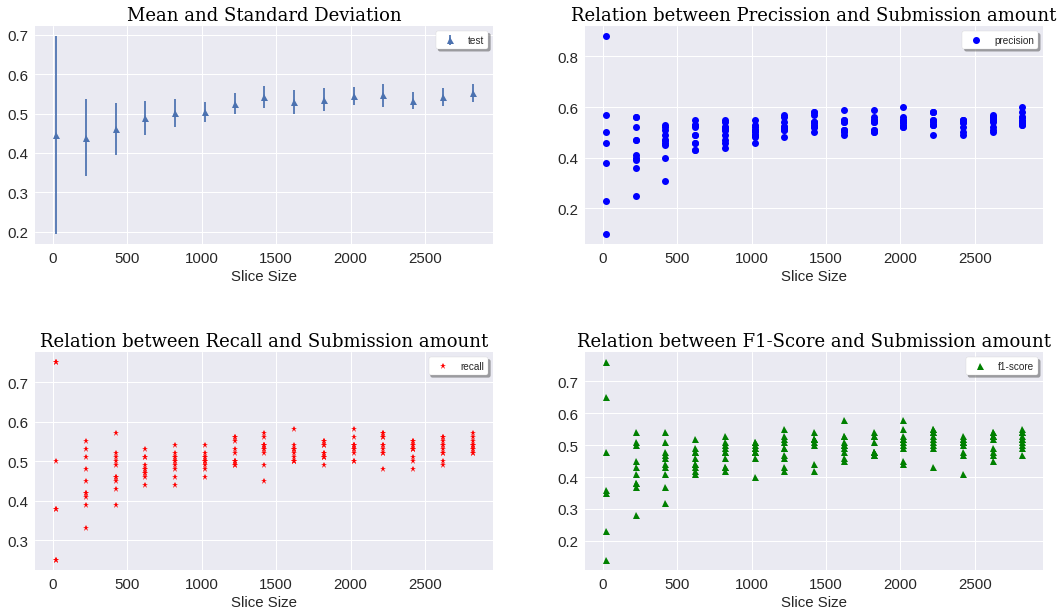

In [52]:
analyze_one_exercise('Triángulos', 200)

### siguiente exercise (Guide 2)

Total Amount of training examples 1592 

Distribution (only to remember) status
errored                   0.160176
failed                   0.0577889
passed                    0.776382
passed_with_warnings    0.00565327
exercise                 siguiente
submission_amount             1592
dtype: object


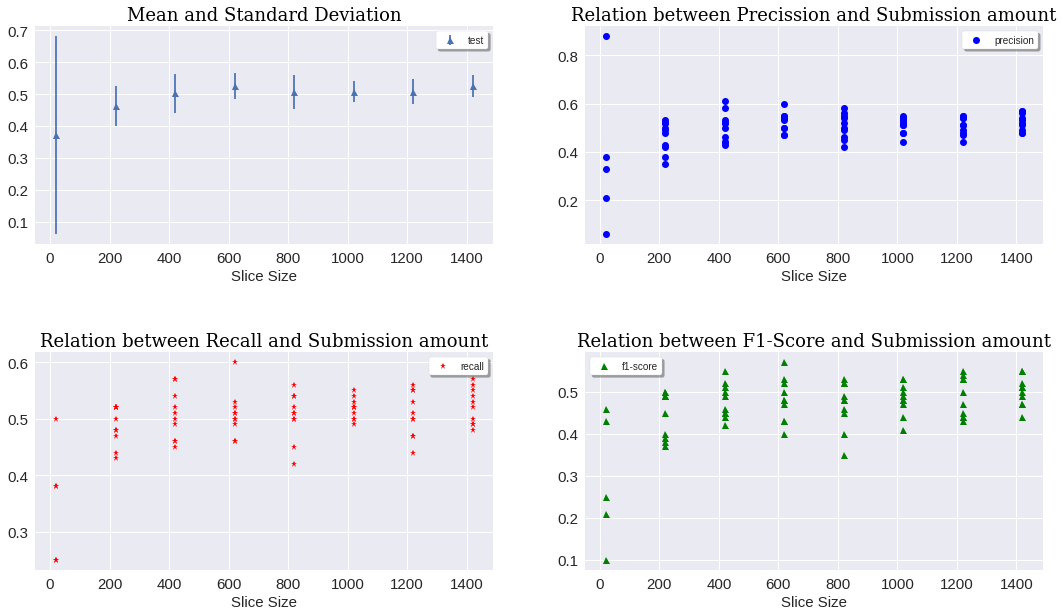

In [53]:
analyze_one_exercise('siguiente', 200)

### triple exercise (Guide 2)

Total Amount of training examples 1487 

Distribution (only to remember) status
errored                 0.103564
failed                  0.063887
passed                  0.765972
passed_with_warnings    0.066577
exercise                  triple
submission_amount           1487
dtype: object


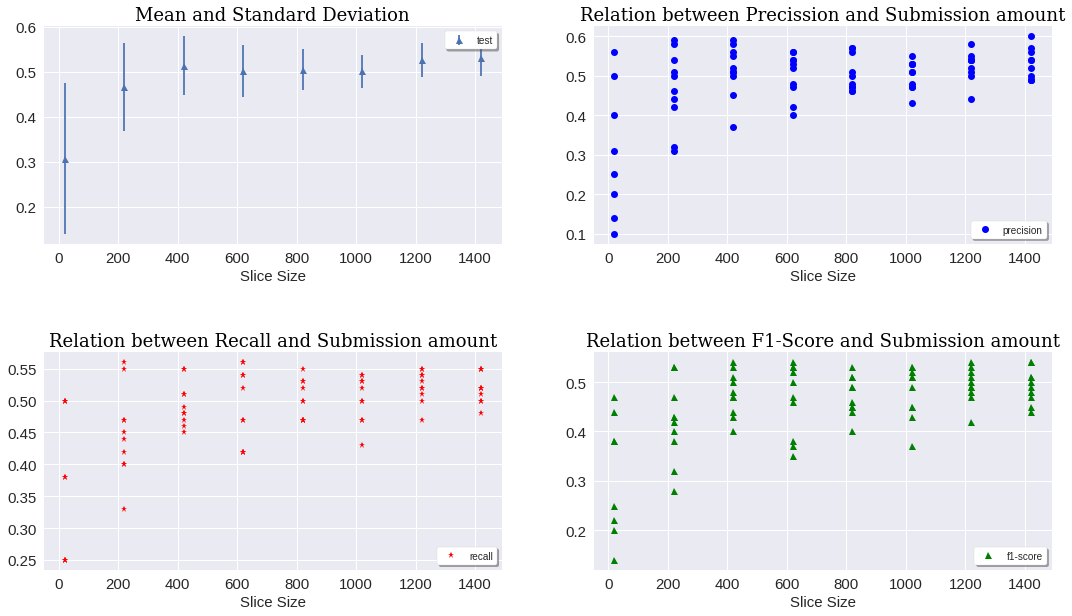

In [54]:
analyze_one_exercise('triple', 200)

### tipando funciones exercise (Guide 3)

Total Amount of training examples 1999 

Distribution (only to remember) status
errored                          0.216608
failed                            0.23912
passed                           0.513257
passed_with_warnings            0.0310155
exercise                Tipando funciones
submission_amount                    1999
dtype: object


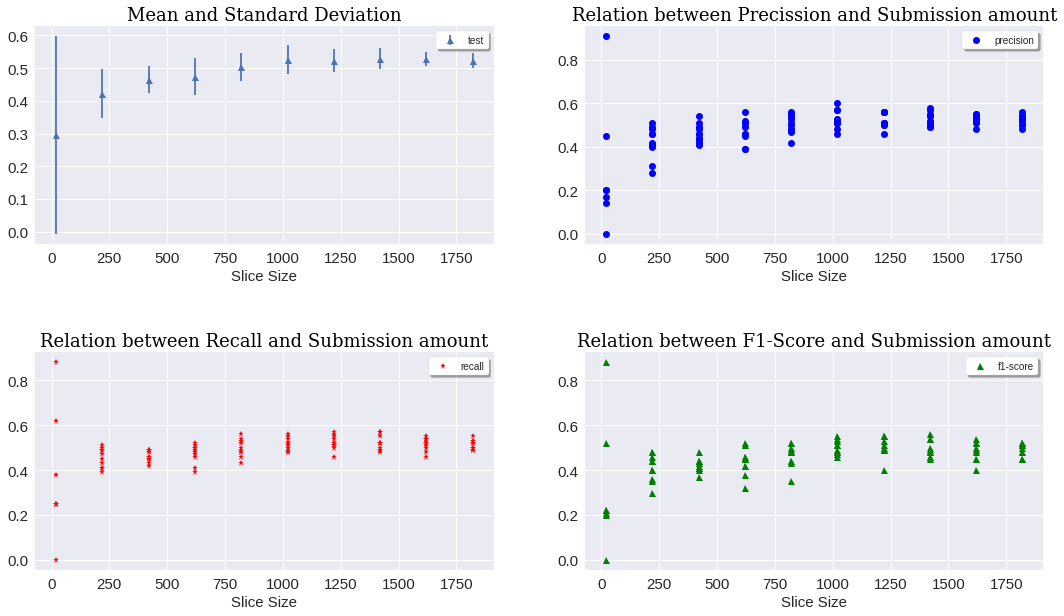

In [55]:
analyze_one_exercise('Tipando funciones', 200)

# Two majority class with less than 1k submissions

## Productoria exercise (Guide 11)

Total Amount of training examples 640 

Distribution (only to remember) status
errored                    0.232813
failed                     0.409375
passed                     0.335938
passed_with_warnings       0.021875
exercise                productoria
submission_amount               640
dtype: object


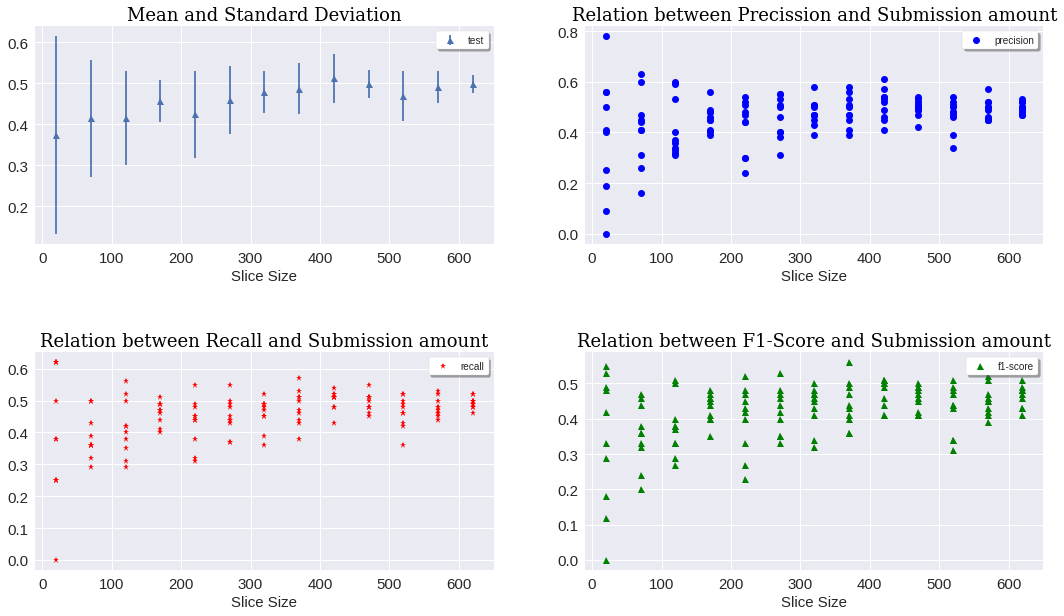

In [56]:
analyze_one_exercise('productoria', 50)

## Primero lo primero: mapeos, exercise 

Total Amount of training examples 659 

Distribution (only to remember) status
errored                                   0.423369
failed                                   0.0971168
passed                                     0.46434
passed_with_warnings                     0.0151745
exercise                Primero lo primero: mapeos
submission_amount                              659
dtype: object


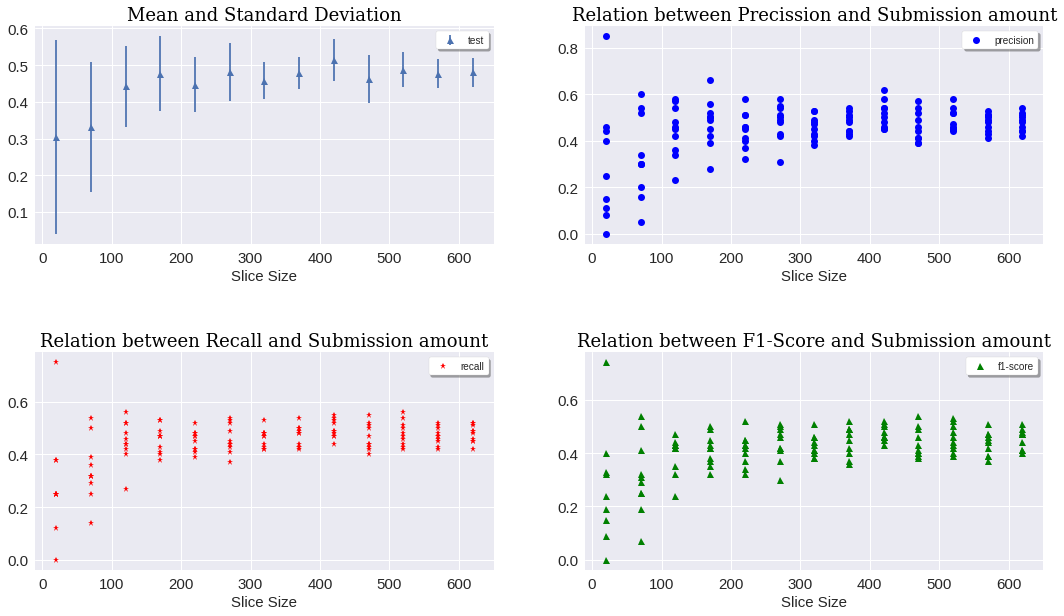

In [57]:
analyze_one_exercise('Primero lo primero: mapeos', 50)

## sinRepetidos exercise (Guide 11)

Total Amount of training examples 583 

Distribution (only to remember) status
errored                     0.214408
failed                      0.389365
passed                      0.380789
passed_with_warnings       0.0154374
exercise                sinRepetidos
submission_amount                583
dtype: object


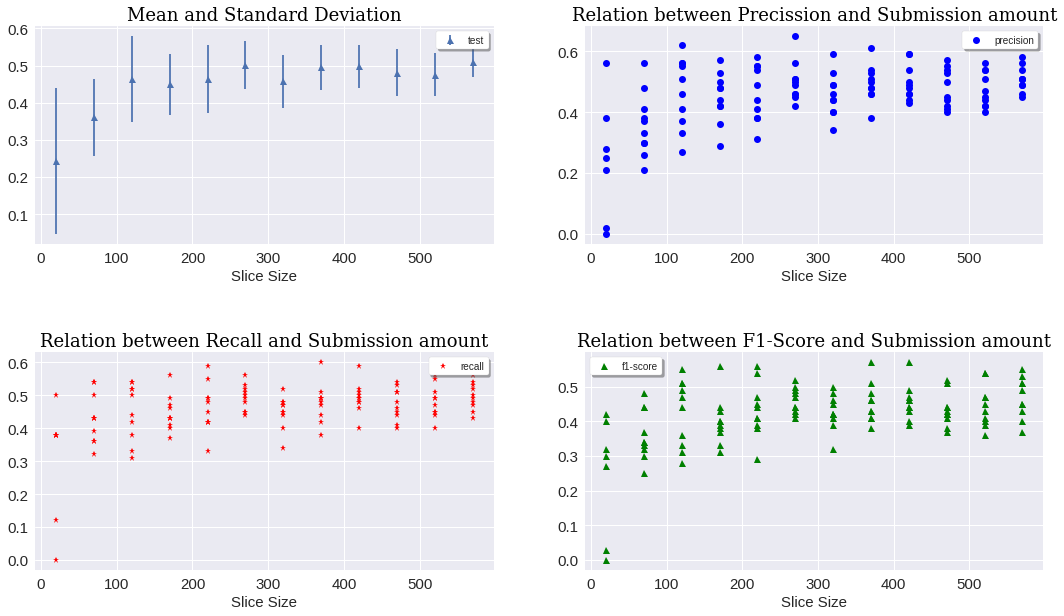

In [58]:
analyze_one_exercise('sinRepetidos', 50)

## maximo exercise (Guide 11)

Total Amount of training examples 657 

Distribution (only to remember) status
errored                  0.190259
failed                   0.480974
passed                   0.305936
passed_with_warnings    0.0228311
exercise                   maximo
submission_amount             657
dtype: object


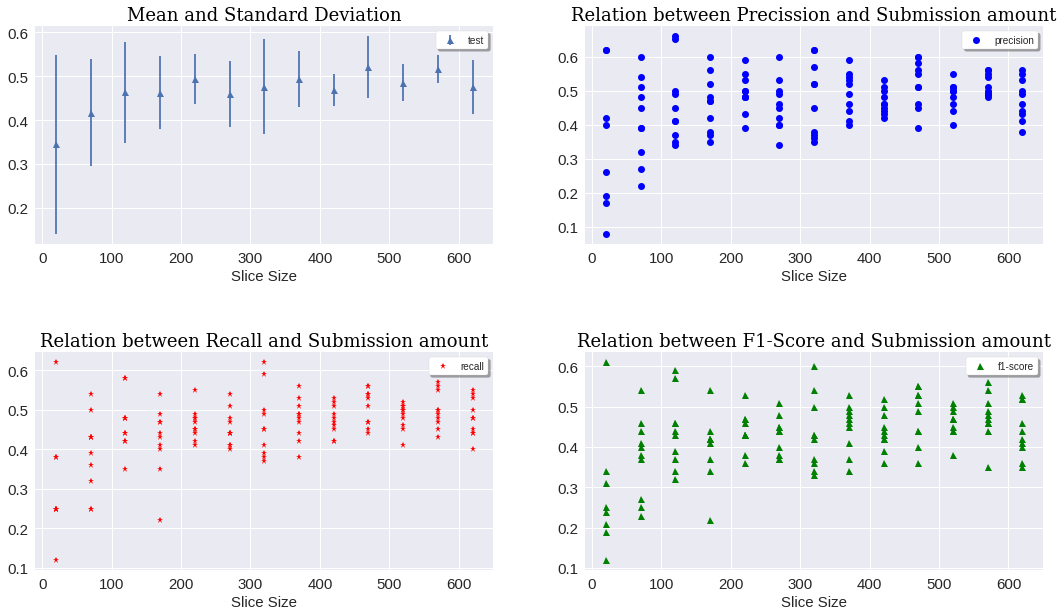

In [59]:
analyze_one_exercise('maximo', 50)

## estaVacio, con data exercise

Total Amount of training examples 600 

Distribution (only to remember) status
errored                            0.311667
failed                             0.218333
passed                             0.381667
passed_with_warnings              0.0883333
exercise                estaVacio, con data
submission_amount                       600
dtype: object


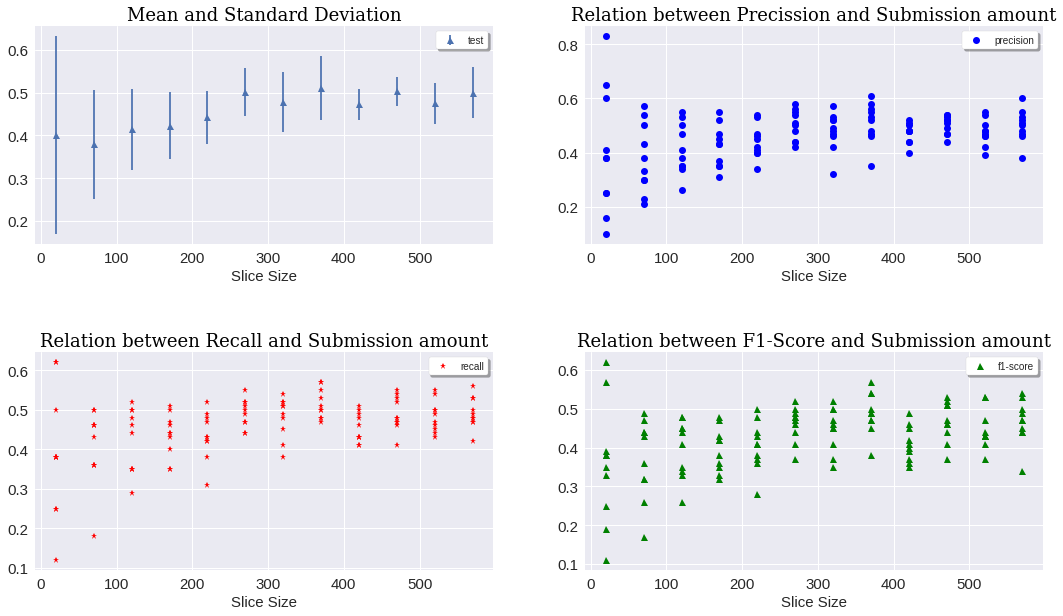

In [60]:
analyze_one_exercise('estaVacio, con data', 50)

# Two majority class with more than 1k submissions

## pinos exercise (Guide 2)

Total Amount of training examples 3060 

Distribution (only to remember) status
errored                  0.426797
failed                   0.415686
passed                   0.101961
passed_with_warnings    0.0555556
exercise                    Pinos
submission_amount            3060
dtype: object


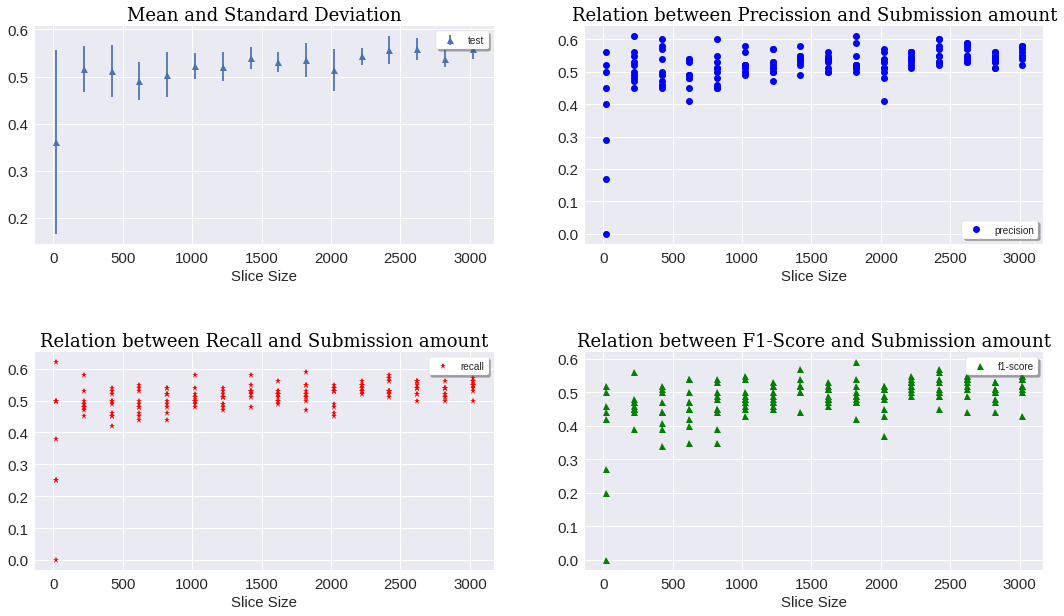

In [61]:
analyze_one_exercise('Pinos', 200)

## EsMultiploDe (Guide 2)

Total Amount of training examples 11567 

Distribution (only to remember) status
errored                     0.356445
failed                      0.369672
passed                      0.199101
passed_with_warnings       0.0747817
exercise                esMultiploDe
submission_amount              11567
dtype: object


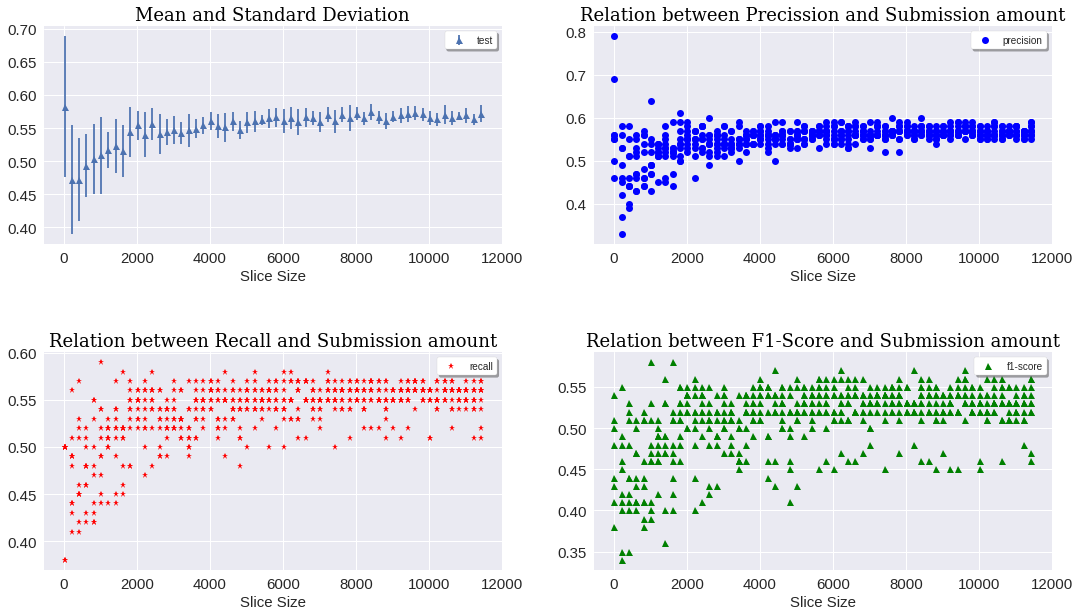

In [63]:
analyze_one_exercise('esMultiploDe', 200)

## Terminala Parte 2 Exercise (Guide 10)

Total Amount of training examples 884 

Distribution (only to remember) status
errored                            0.415158
failed                              0.18552
passed                             0.394796
passed_with_warnings             0.00452489
exercise                ¡Terminala! Parte 2
submission_amount                       884
dtype: object


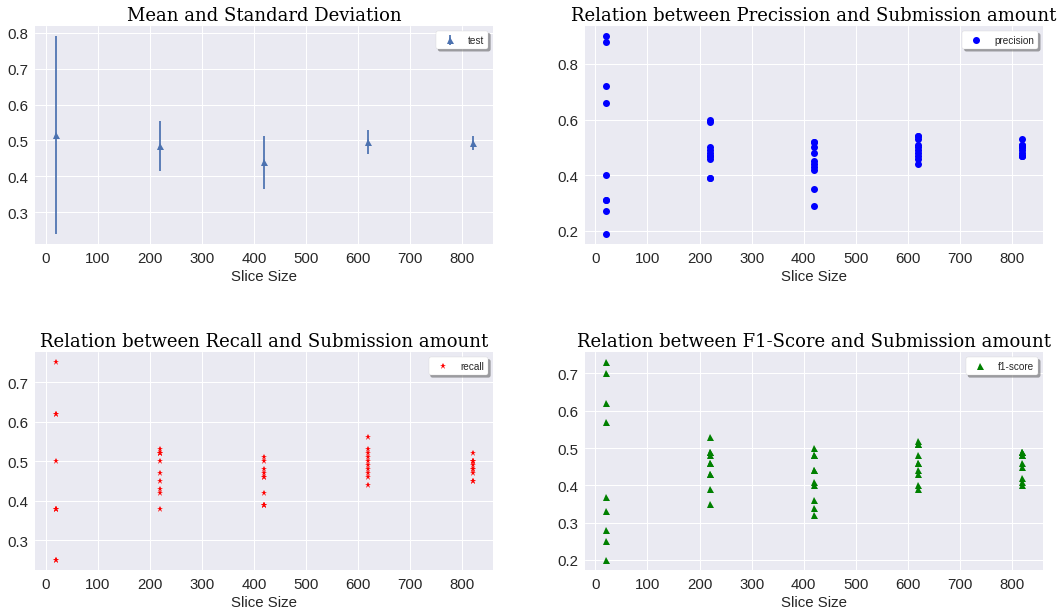

In [64]:
analyze_one_exercise('¡Terminala! Parte 2', 200)

## Mas llamadas Exercise (Guide 9)

Total Amount of training examples 2489 

Distribution (only to remember) status
errored                      0.46364
failed                      0.340699
passed                       0.17035
passed_with_warnings       0.0253114
exercise                Más llamadas
submission_amount               2489
dtype: object


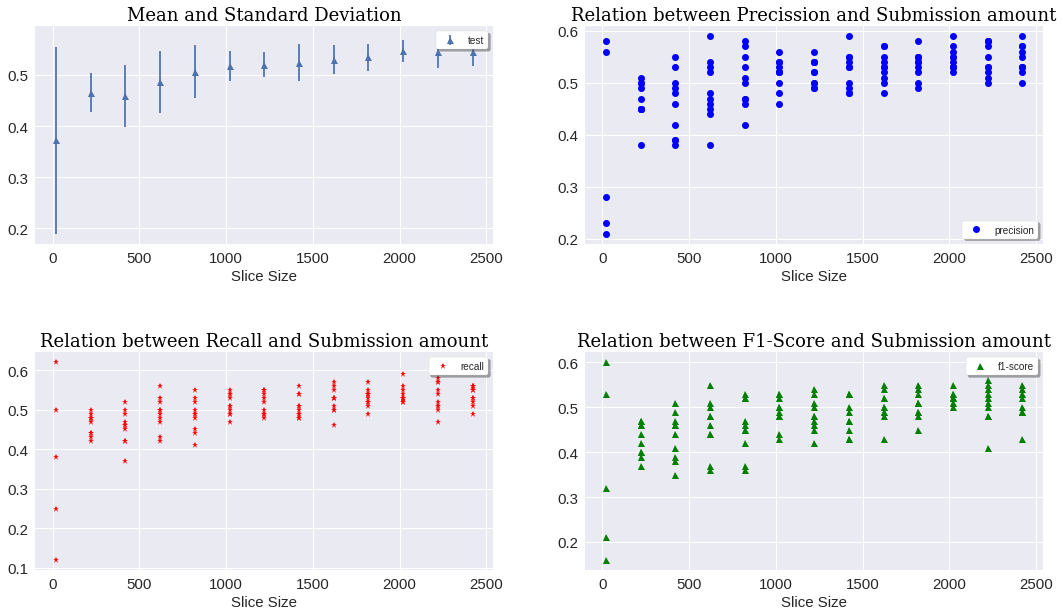

In [65]:
analyze_one_exercise('Más llamadas', 200)

## fahrToCelsius Exercise (Guide 2)

Total Amount of training examples 2934 

Distribution (only to remember) status
errored                   0.223586
failed                    0.333333
passed                    0.443081
exercise             fahrToCelsius
submission_amount             2934
dtype: object


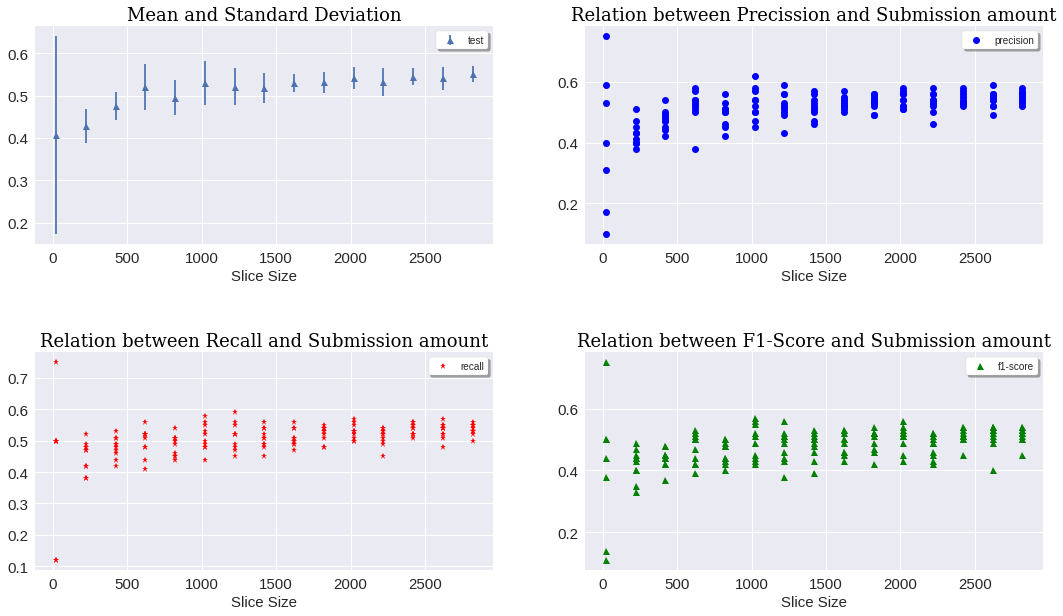

In [66]:
analyze_one_exercise('fahrToCelsius', 200)